### Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

### Loading dataset

In [3]:
sources=pd.read_csv('EdStatsCountry-Series.csv')
sources['Unnamed: 3'].unique()
sources.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [4]:
country_stats=pd.read_csv('EdStatsCountry.csv')
country_stats.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
indicators=pd.read_csv('EdStatsData.csv')
indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
notes_indicators=pd.read_csv('EdStatsFootNote.csv')
notes_indicators.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [7]:
series=pd.read_csv('EdStatsSeries.csv')
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Detecting missing values

#### EdStatsCountry-Series

In [8]:
print('Dataset : sources','\n', 'Number of line : ',sources.shape[0],'\n','Nombre de columns : ', sources.shape[1])

Dataset : sources 
 Number of line :  613 
 Nombre de columns :  4


In [9]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [10]:
print('Duplicated lines = ', sources.duplicated(subset=['CountryCode','SeriesCode']).sum())

Duplicated lines =  0


Le dataset "sources" issu de EdStatsCountry-Series est globalement de bonne qualité. Seule la colonne 'Unnamed: 3" contient des Nans et il n'y a pas de lignes dupliquées.
The sources dataset is of good quality. Only the "Unnamed column: 3" contains Nans ans there is no duplicated line.

In [11]:
#Removing the empty columns
sources.dropna(axis=1,how='all',inplace=True)

#### EdStatsCountry

In [12]:
print('Dataset : country_stats','\n','Number of lines : ',country_stats.shape[0],'\n','Nombur of columns : ', country_stats.shape[1])

Dataset : country_stats 
 Number of lines :  241 
 Nombur of columns :  32


In [13]:
country_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

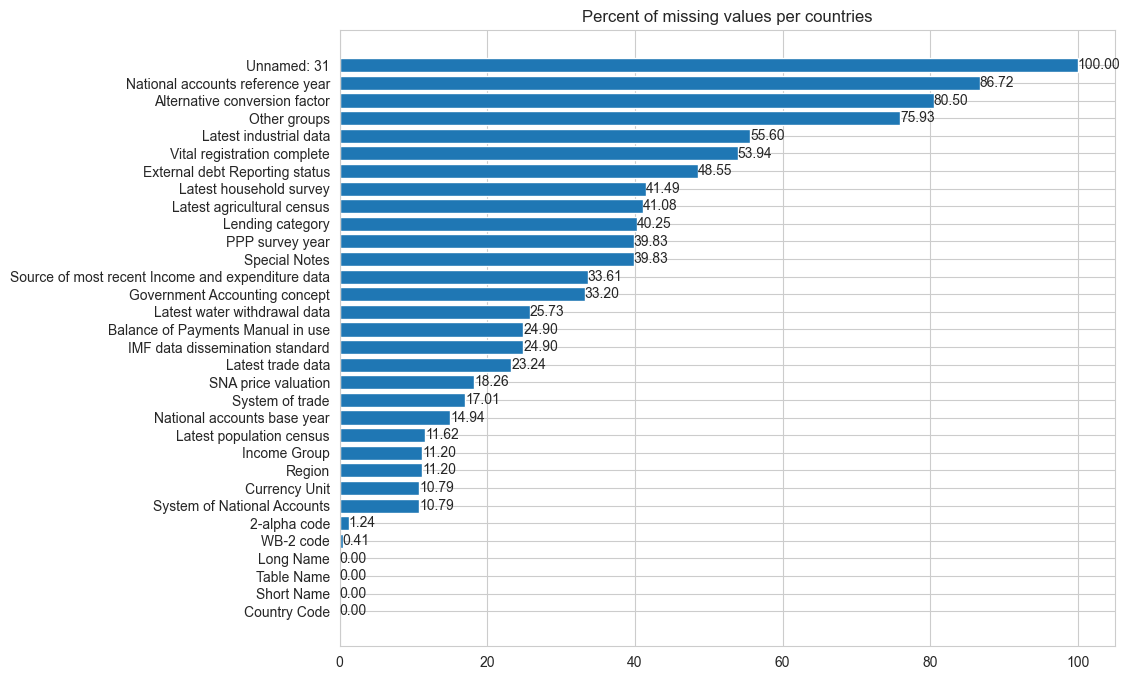

In [14]:
#Missing values
percent_missing_country=100*country_stats.isna().sum().sort_values()/country_stats.shape[0]

plt.figure(figsize=(10,8))
fig=plt.barh(percent_missing_country.index,percent_missing_country)
plt.title('Percent of missing values per countries')
plt.bar_label(fig, fmt='%.2f')
plt.show()


In [15]:
print('Number of duplicated lines = ', country_stats.duplicated(subset=['Country Code']).sum())

Number of duplicated lines =  0


Among the available columns: Country Code, Short Name, Table Name, and Long Name are complete.
The other columns have a lot of missing data. There are no duplicate rows.

In [16]:
country_stats.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [17]:
#Removing the empty columns
country_stats.dropna(axis=1,how='all',inplace=True)

#### <a id='toc1_1_3_3_'></a>[indicators (EdStatsData)](#toc0_)

In [18]:
print('Dataset : indicators','\n','Number of lines : ',indicators.shape[0],'\n','Number of columns : ', indicators.shape[1])

Dataset : indicators 
 Number of lines :  886930 
 Number of columns :  70


In [19]:
indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

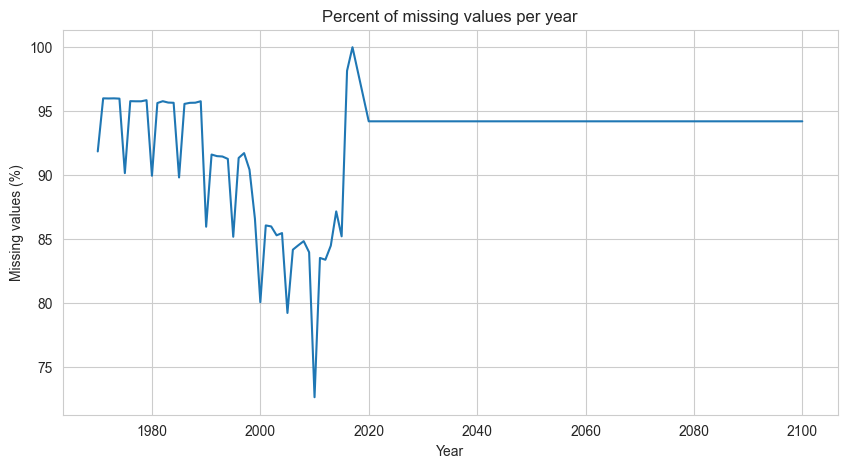

In [20]:
#Missing values :

isYearFilter=[col.isdigit() for col in indicators.columns]
percent_missing_ind=100*indicators.loc[:,isYearFilter].isna().sum()/indicators.shape[0]
percent_missing_ind.index=pd.to_datetime(percent_missing_ind.index)

plt.plot(percent_missing_ind.index,percent_missing_ind)
plt.title('Percent of missing values per year')
plt.xlabel('Year')
plt.ylabel('Missing values (%)')
plt.show()



In [21]:
print('Number of duplicated lines = ', indicators.duplicated(subset=['Country Code','Indicator Code']).sum())

Number of duplicated lines =  0


Among the available columns: Country Name, Country Code, Indicator Name, and Indicator Code are complete. 
The data by year contains a significant amount of missing values (>70%). There are no duplicate rows.

In [22]:
indicators.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [23]:
#Deleting empty columns
indicators.dropna(axis=1,how='all',inplace=True)

#### <a id='toc1_1_3_4_'></a>[notes_indicators (EdStatsFootNote)](#toc0_)

In [24]:
print('Dataset : notes_indicators','\n','Number of lines : ',notes_indicators.shape[0],'\n','Number of columns : ', notes_indicators.shape[1])

Dataset : notes_indicators 
 Number of lines :  643638 
 Number of columns :  5


In [25]:
notes_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [26]:
print('Number of duplicated lines = ', notes_indicators.duplicated(subset=['CountryCode','SeriesCode','Year']).sum())

Number of duplicated lines =  0


The “notes_indicators” dataset is generally of good quality. Only the column ‘Unnamed: 4’ contains NaN values, and there are no duplicate rows.

In [27]:
#Deleting empty columns
notes_indicators.dropna(axis=1,how='all',inplace=True)

#### <a id='toc1_1_3_5_'></a>[series (EdStatsSeries)](#toc0_)

In [28]:
print('Dataset : series','\n','Number of lines : ',series.shape[0],'\n','Number of columns : ', series.shape[1])

Dataset : series 
 Number of lines :  3665 
 Number of columns :  21


In [29]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

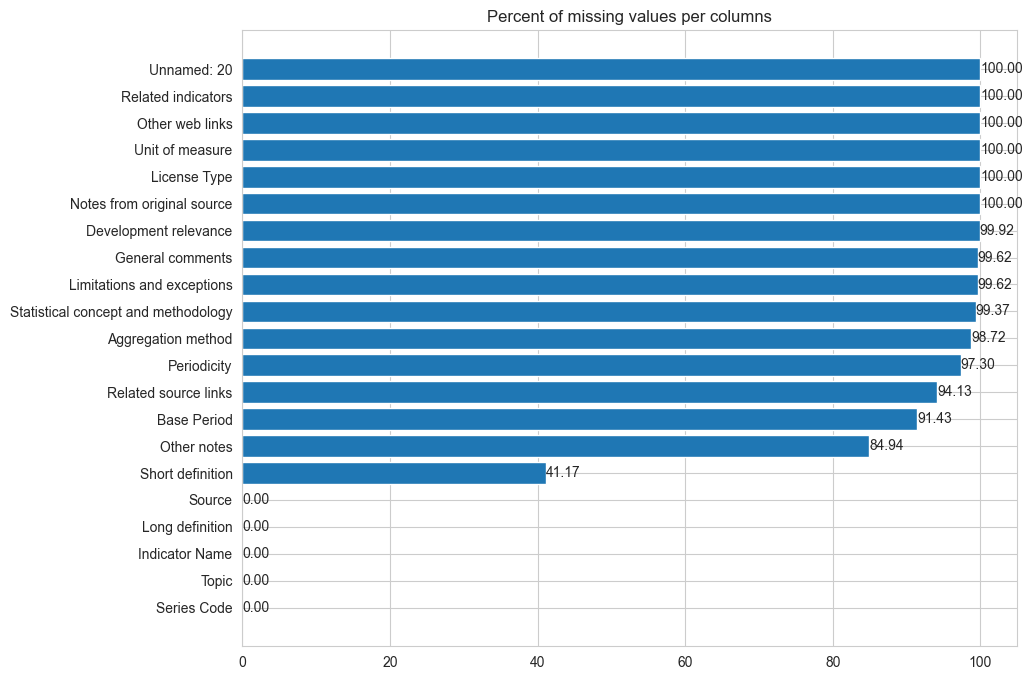

In [30]:
#Missing values
percent_missing_series=100*series.isna().sum().sort_values()/series.shape[0]

plt.figure(figsize=(10,8))
fig=plt.barh(percent_missing_series.index,percent_missing_series)
plt.title('Percent of missing values per columns')
plt.bar_label(fig,fmt='%.2f')
plt.show()

In [31]:
print('Number of duplicated lines = ', series.duplicated(subset=['Series Code']).sum())

Number of duplicated lines =  0


Among the available columns: Series Code, Topic, Indicator Name, and Long definition are complete. Short definition is partially filled (with 41% missing data).
The other columns have a high rate of NaN values (>=85%) or are empty.

In [32]:
#Deleteing empty columns
series.dropna(axis=1,how='all',inplace=True)

### Selecting the important data

In [33]:
indicators['Indicator Name'].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [34]:
#Interesting labels for the analysis:

interesting_labels=indicators['Indicator Name'].isin([
'Adjusted net enrolment rate, upper secondary, both sexes (%)',
'Adult literacy rate, population 15+ years, both sexes (%)',
'Barro-Lee: Average years of secondary schooling, age 25+, total',
'Barro-Lee: Average years of tertiary schooling, age 75+, total',
'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)',
'Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary',
'Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
'Barro-Lee: Percentage of population age 75+ with tertiary schooling. Total (Incomplete and Completed Tertiary)',
'DHS: Average years of schooling by age group. Age 15-19',
'DHS: Secondary completion rate',
'Duration of compulsory education (years)',
'Enrolment in secondary education, both sexes (number)',
'Enrolment in tertiary education, all programmes, both sexes (number)',
'Internet users (per 100 people)',
'MICS: Secondary completion rate',
'Personal computers (per 100 people)',
'PISA: Mean performance on the mathematics scale',
'PISA: Mean performance on the reading scale',
'PISA: Mean performance on the science scale',
'Population, total',
'Pupil-teacher ratio in tertiary education (headcount basis)',
'Pupil-teacher ratio in upper secondary education (headcount basis)',
'SACMEQ: Mean performance on the mathematics scale',
'SACMEQ: Mean performance on the reading scale, total',
'UIS: Mean years of schooling of the population age 25+. Total',
"UIS: Percentage of population age 25+ with at least a completed bachelor's or equivalent degree (ISCED 6 or higher). Total",
'UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total'])


In [35]:
#Percent of missing values for those labels:

number_columns=len(indicators[interesting_labels].groupby('Indicator Name').count().columns)
number_years=len(indicators['Country Name'].unique())

(indicators[interesting_labels].groupby('Indicator Name').count().sum(axis=1)/(number_years*number_columns)*100
 ).round(1).sort_values(ascending=False)

Indicator Name
Population, total                                                                                                             72.2
Enrolment in secondary education, both sexes (number)                                                                         49.4
Enrolment in tertiary education, all programmes, both sexes (number)                                                          44.6
Internet users (per 100 people)                                                                                               37.5
Pupil-teacher ratio in tertiary education (headcount basis)                                                                   26.5
Duration of compulsory education (years)                                                                                      25.3
Personal computers (per 100 people)                                                                                           21.4
Pupil-teacher ratio in upper secondary education (headcount basis)  

In [36]:
kept_labels=[
    'Population, total',
    'Enrolment in secondary education, both sexes (number)' ,
    'Enrolment in tertiary education, all programmes, both sexes (number)' ,
    'Internet users (per 100 people)',
    'Pupil-teacher ratio in tertiary education (headcount basis)',
    'Duration of compulsory education (years)' ,
    'Personal computers (per 100 people)',
    'Pupil-teacher ratio in upper secondary education (headcount basis)']
kept_labels_filter=indicators['Indicator Name'].isin(kept_labels)
kept_data=indicators[kept_labels_filter]

#Non empty columns for the kept data
kept_data.dropna(axis=1,how='all').columns



Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

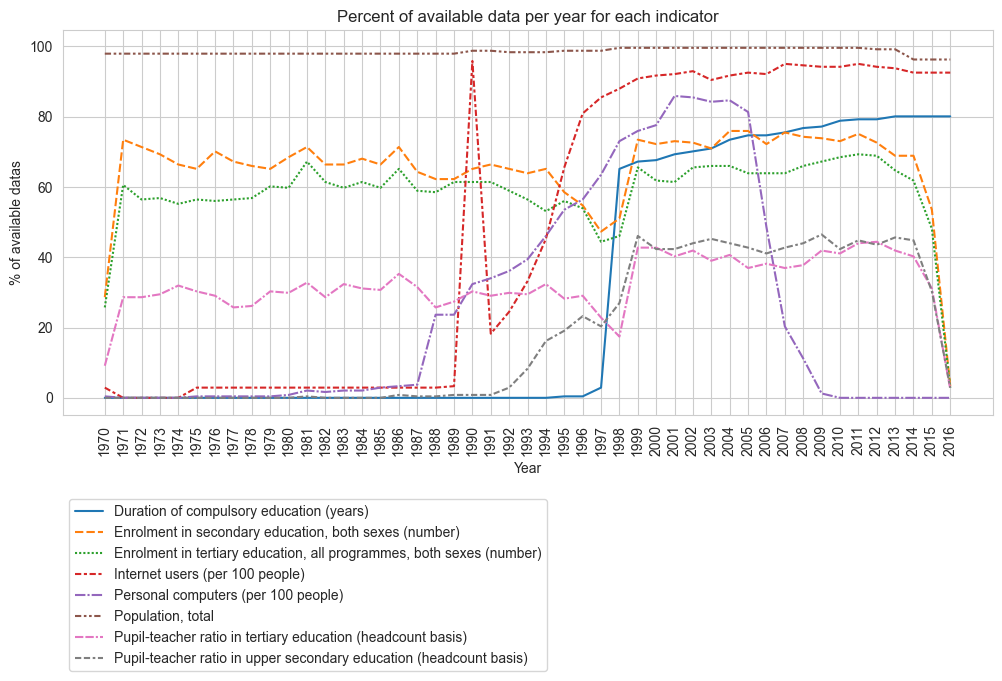

In [37]:
#Available data :

temp=kept_data.groupby('Indicator Name').count()

plt.figure(figsize=(12,5))
sns.lineplot(temp.loc[:,'1970':'2016'].T*100/241)
plt.title('Percent of available data per year for each indicator')
plt.xlabel('Year')
plt.ylabel("% of available datas")
plt.legend(loc='upper left',bbox_to_anchor=(0,-0.2))
plt.xticks(rotation = 90)
plt.show()

The years 1999 to 2005 contain the largest amount of data.
‘Internet users’ has more recent data than ‘Personal computers’, for which the number of available data decreases rapidly from 2005.
The last year with an acceptable rate of data is 2014 if we exclude the ‘Personal computers’ indicator.

In [38]:
#Checking the correlation between 'personnal_computers' and 'internet users'.
personnal_computers=kept_data.loc[kept_data['Indicator Name']=='Personal computers (per 100 people)','2005']
internet=kept_data.loc[kept_data['Indicator Name']=='Internet users (per 100 people)','2005']
country=kept_data['Country Name']

pd.DataFrame({'Country Name' :country,'computers':personnal_computers,'internet users':internet}).groupby('Country Name').mean().corr()


,computers,internet users
computers,1.000000,0.912364
internet users,0.912364,1.000000


The “Personal computers” and “Internet users” data are quite strongly correlated.
As the data on “Personal computers” stops in 2005, this indicator will not be taken into account.

In [39]:
#Droping the 'personnal_computers' indicator
kept_labels.remove('Personal computers (per 100 people)')
filtre_retenus=indicators['Indicator Name'].isin(kept_labels)
kept_data=indicators[filtre_retenus]

In [40]:
series_kept=series[series['Indicator Name'].isin(kept_labels)].dropna(axis=1,how='all')
series_kept

,Series Code,Topic,Indicator Name,Long definition,Periodicity,Aggregation method,Limitations and exceptions,General comments,Source
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Annual,Weighted average,Operators have traditionally been the main sou...,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T..."
2216,SE.COM.DURS,Background,Duration of compulsory education (years),Number of years that children are legally obli...,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics
2294,SE.SEC.ENRL,Secondary,"Enrolment in secondary education, both sexes (...",Total number of students enrolled at public an...,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics
2332,SE.TER.ENRL,Tertiary,"Enrolment in tertiary education, all programme...",The total number of students enrolled at publi...,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics
2590,SP.POP.TOTL,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...,Annual,Sum,Current population estimates for developing co...,Relevance to gender indicator: disaggregating ...,(1) United Nations Population Division. World ...
3282,UIS.PTRHC.3,Teachers,Pupil-teacher ratio in upper secondary educati...,Average number of pupils per teacher at a give...,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics
3285,UIS.PTRHC.56,Teachers,Pupil-teacher ratio in tertiary education (hea...,Average number of pupils per teacher at a give...,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics


Apart from the population and internet users, the rest of the indicators come from the same source (UNESCO Institute for Statistics).

In [41]:
#Codes for the kept indicators :
dict_kept=dict(zip(series_kept['Indicator Name'],series_kept['Series Code']))
dict_kept

{'Internet users (per 100 people)': 'IT.NET.USER.P2',
 'Duration of compulsory education (years)': 'SE.COM.DURS',
 'Enrolment in secondary education, both sexes (number)': 'SE.SEC.ENRL',
 'Enrolment in tertiary education, all programmes, both sexes (number)': 'SE.TER.ENRL',
 'Population, total': 'SP.POP.TOTL',
 'Pupil-teacher ratio in upper secondary education (headcount basis)': 'UIS.PTRHC.3',
 'Pupil-teacher ratio in tertiary education (headcount basis)': 'UIS.PTRHC.56'}

In [42]:
# Filter on the years with the most data
# In order to keep comparable data while trying to keep a maximum number of rows, the average of the values of the
# Indicators for the last 5 years with a significant amount of data (2009 and 2014) will be taken as an indicator

kept_columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2009','2010','2011','2012','2013','2014']

data_raw=kept_data.loc[:,kept_columns]
data_raw.dropna(axis=0,subset=[ '2009','2010','2011','2012','2013','2014','2013','2014'],how='all',inplace=True)
data_raw


,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.957251e+07,3.013438e+07,3.129979e+07,3.181115e+07,3.125060e+07,3.097225e+07
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN
2533,Arab World,ARB,"Population, total",SP.POP.TOTL,3.401490e+08,3.477370e+08,3.551370e+08,3.624666e+08,3.697615e+08,NaN
2554,Arab World,ARB,Pupil-teacher ratio in upper secondary educati...,UIS.PTRHC.3,1.211638e+01,1.250909e+01,1.328684e+01,1.301317e+01,1.297931e+01,1.360266e+01
...,...,...,...,...,...,...,...,...,...,...
884456,Zimbabwe,ZWE,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,NaN,NaN,NaN,9.367340e+05,9.574610e+05,NaN
884469,Zimbabwe,ZWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,9.461100e+04,9.328500e+04,9.401200e+04,9.411500e+04,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01
885798,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07


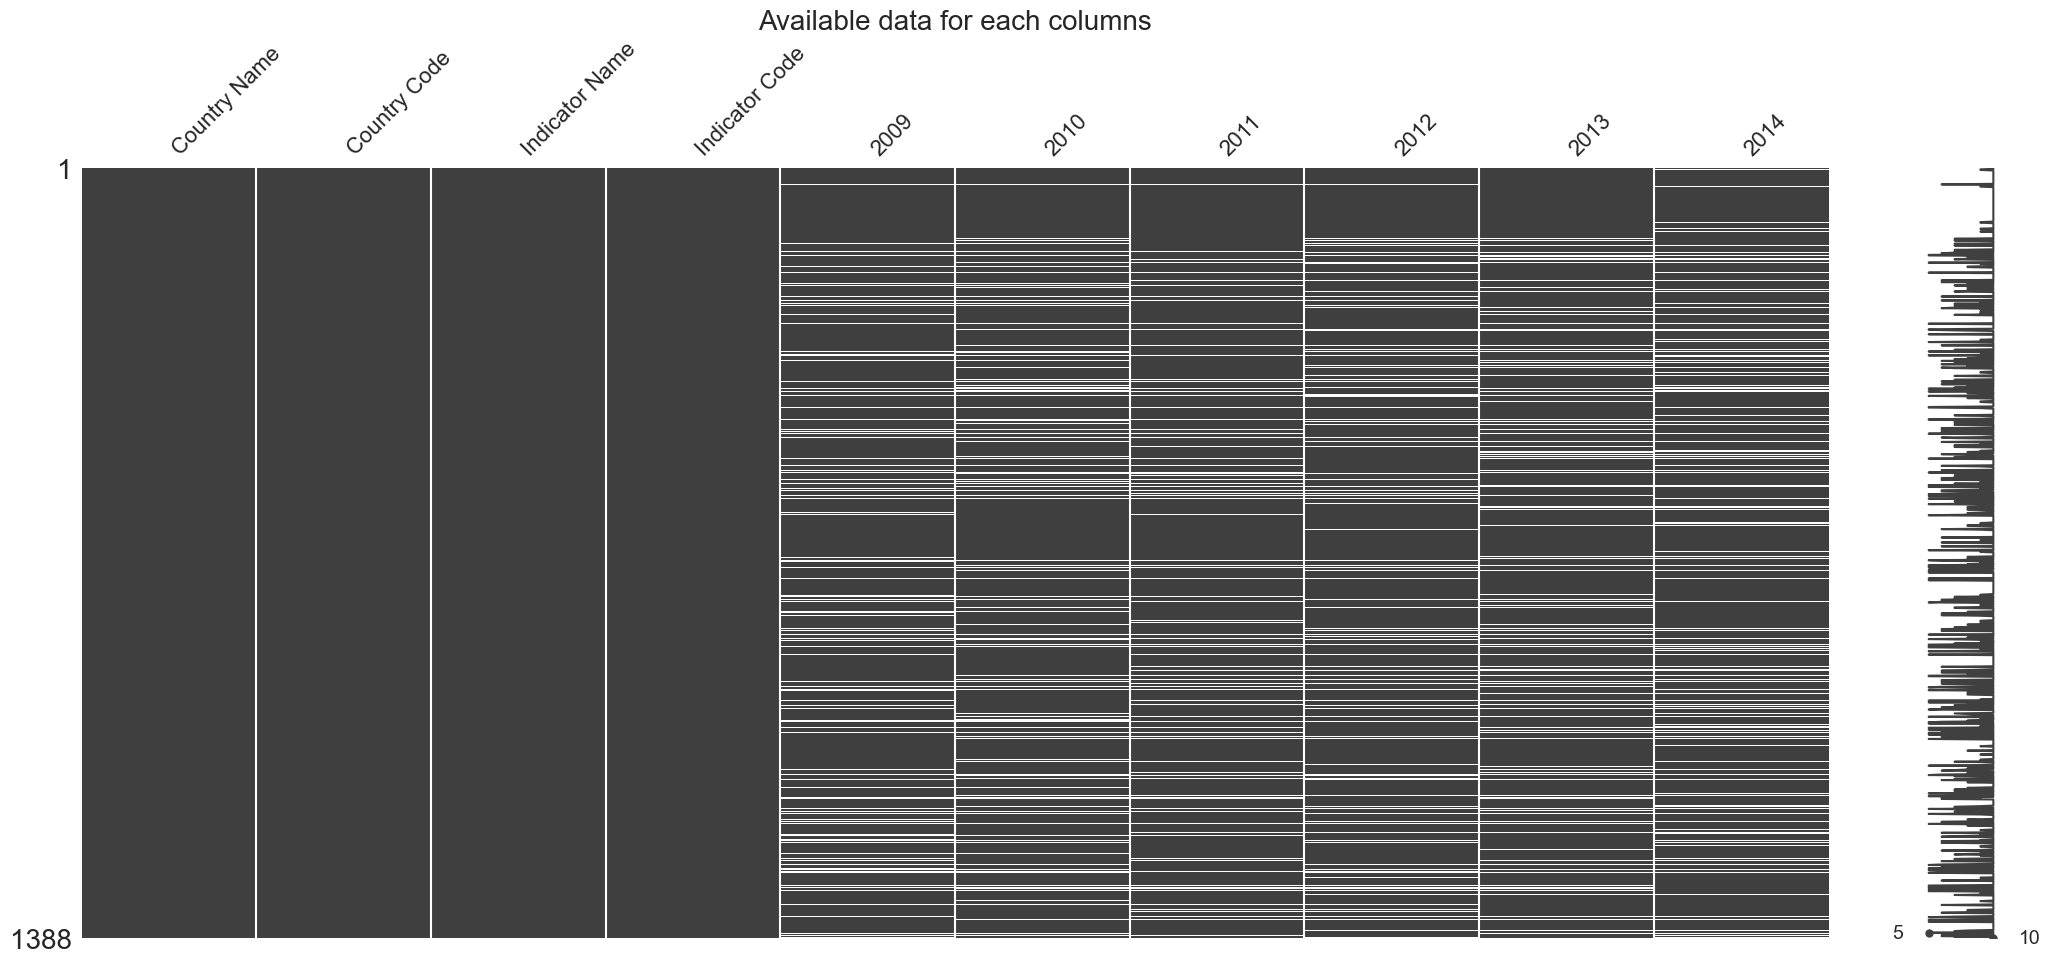

In [43]:
msno.matrix(data_raw)
plt.title('Available data for each columns',fontsize = 20)
plt.show()


### Data cleaning
#### Imputation of missing data with other years data

Before calculating the average by indicator and by country, the missing data per year will be imputed with the average of this indicator for this country over the years 2009 to 2016.

In [44]:
data_to_impute=data_raw.iloc[:,4:10].T #Selection of columns to impute and transformation to have individuals in column for imputation
index=data_to_impute.index
columns=data_to_impute.columns
imputer=SimpleImputer(strategy='mean')
data_imp=pd.DataFrame(imputer.fit_transform(data_to_impute),index=index)
data_imp.columns=columns
data_imp.T

,2009,2010,2011,2012,2013,2014
1191,2.957251e+07,3.013438e+07,3.129979e+07,3.181115e+07,3.125060e+07,3.097225e+07
1204,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06
1375,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,3.006231e+01
2533,3.401490e+08,3.477370e+08,3.551370e+08,3.624666e+08,3.697615e+08,3.550503e+08
2554,1.211638e+01,1.250909e+01,1.328684e+01,1.301317e+01,1.297931e+01,1.360266e+01
...,...,...,...,...,...,...
884456,9.470975e+05,9.470975e+05,9.470975e+05,9.367340e+05,9.574610e+05,9.470975e+05
884469,9.400575e+04,9.461100e+04,9.328500e+04,9.401200e+04,9.411500e+04,9.400575e+04
884640,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01
885798,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07


In [45]:
data_raw=pd.concat([data_raw.iloc[:,:4],data_imp.T],axis=1)
data_raw


,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.957251e+07,3.013438e+07,3.129979e+07,3.181115e+07,3.125060e+07,3.097225e+07
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,3.006231e+01
2533,Arab World,ARB,"Population, total",SP.POP.TOTL,3.401490e+08,3.477370e+08,3.551370e+08,3.624666e+08,3.697615e+08,3.550503e+08
2554,Arab World,ARB,Pupil-teacher ratio in upper secondary educati...,UIS.PTRHC.3,1.211638e+01,1.250909e+01,1.328684e+01,1.301317e+01,1.297931e+01,1.360266e+01
...,...,...,...,...,...,...,...,...,...,...
884456,Zimbabwe,ZWE,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,9.470975e+05,9.470975e+05,9.470975e+05,9.367340e+05,9.574610e+05,9.470975e+05
884469,Zimbabwe,ZWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,9.400575e+04,9.461100e+04,9.328500e+04,9.401200e+04,9.411500e+04,9.400575e+04
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01
885798,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07


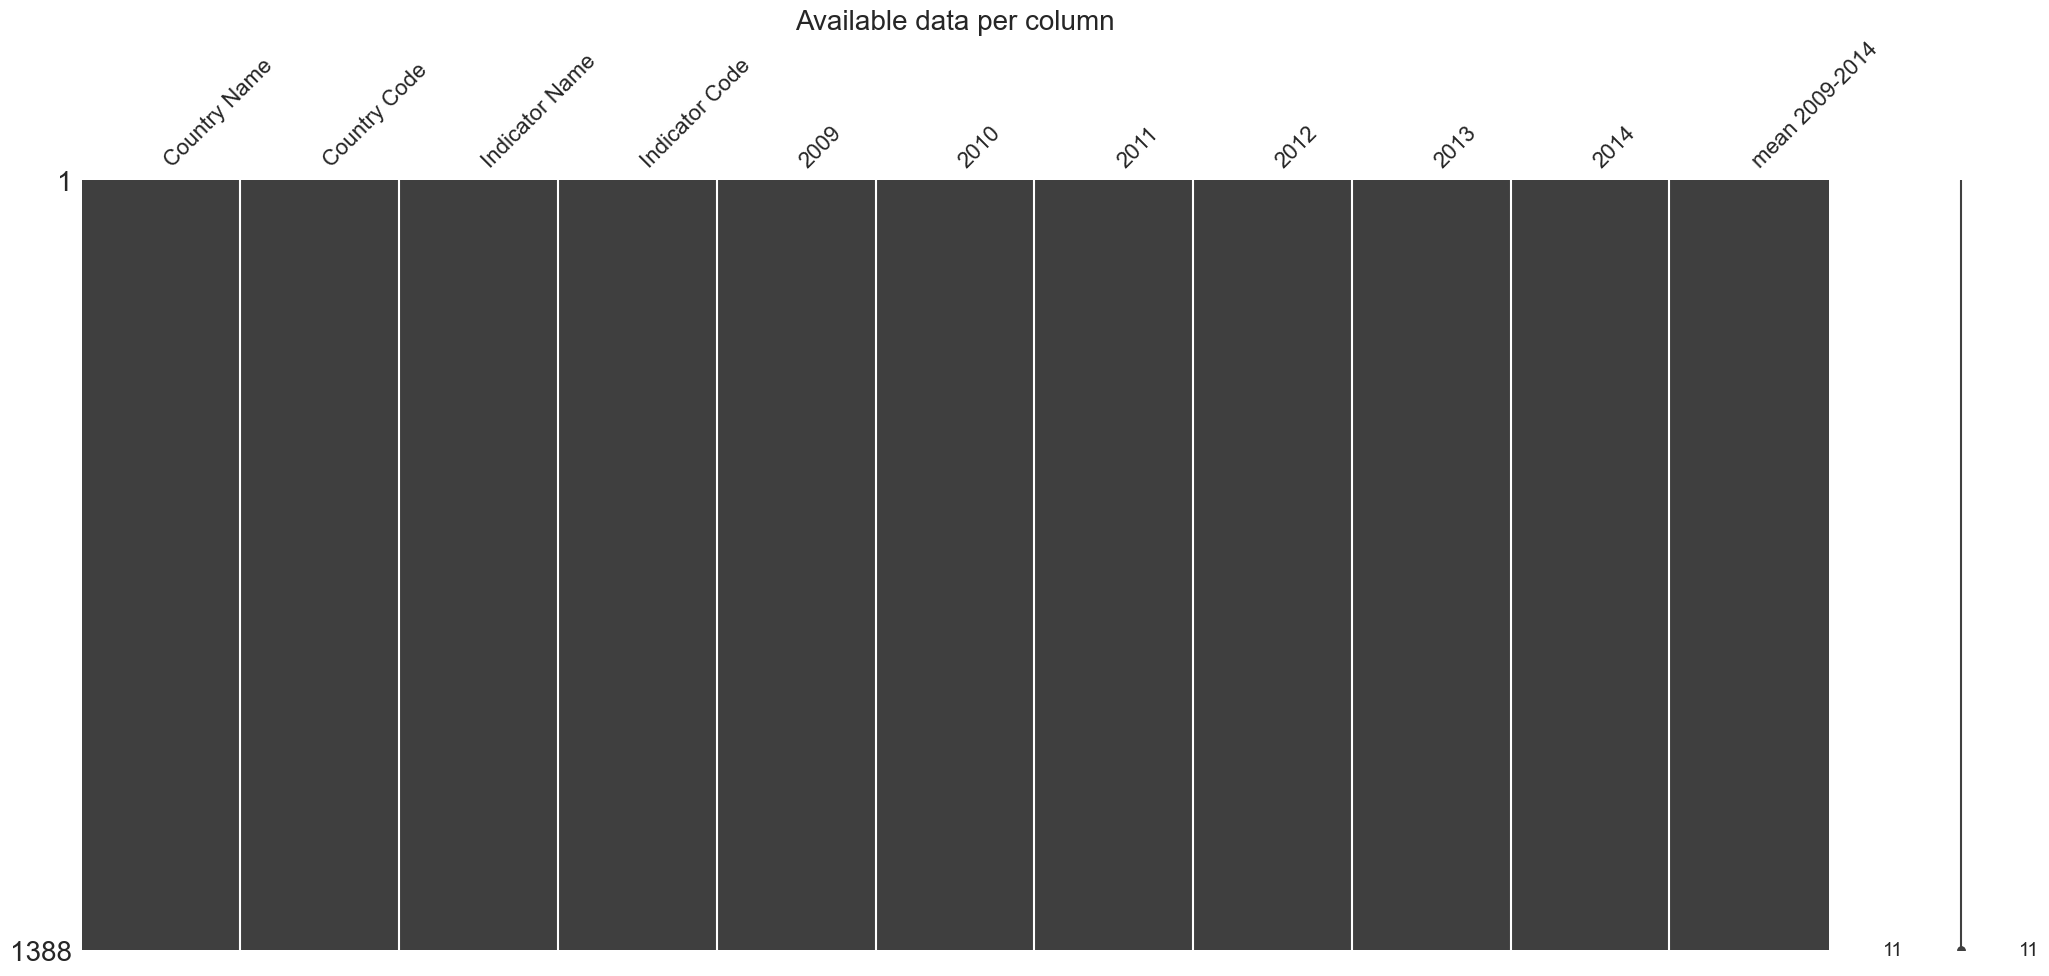

In [46]:
data_raw['mean 2009-2014']=data_raw[[str(i) for i in range (2009,2015)]].mean(axis=1)
msno.matrix(data_raw)
plt.title('Available data per column',fontsize = 20)
plt.show()

In [47]:
def plot_extract(indicator_name): 
    extrait=data_raw.loc[data_raw['Indicator Name']==indicator_name,['Country Name','2009','2010','2011','2012','2013','2014']].sample(10)
    extrait=extrait.melt('Country Name')
    sns.lineplot(data=extrait,x='variable',y='value',hue='Country Name')
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    plt.xlabel('Year')
    plt.ylabel(indicator_name)
    plt.title(indicator_name)
    plt.show()

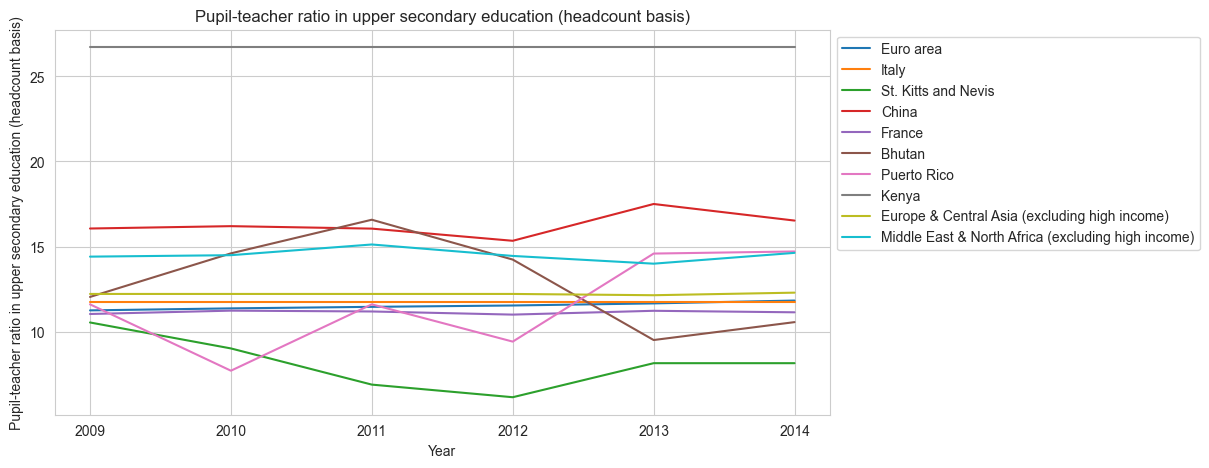

In [48]:
plot_extract('Pupil-teacher ratio in upper secondary education (headcount basis)')

#### Creation of the dataframe that we will use to calculate the score

In [49]:
data_wrk=data_raw[['Country Name','Country Code','Indicator Name','mean 2009-2014']].pivot(index=['Country Name','Country Code'],columns='Indicator Name',values='mean 2009-2014')
data_wrk.dropna(axis=0,subset=[col for col in kept_labels if col!='Population, total'],how='all',inplace=True)
data_wrk.reset_index(inplace=True)
data_wrk

Indicator Name,Country Name,Country Code,Duration of compulsory education (years),"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",Internet users (per 100 people),"Population, total",Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis)
0,Afghanistan,AFG,9.0,2.254391e+06,1.518543e+05,5.150758,3.028379e+07,28.090020,NaN
1,Albania,ALB,8.5,3.490902e+05,1.430048e+05,51.192660,2.905055e+06,20.576073,17.576995
2,Algeria,DZA,10.0,4.588302e+06,1.198471e+06,18.138333,3.723678e+07,27.088920,NaN
3,Andorra,AND,10.0,4.149667e+03,5.090000e+02,86.144071,8.251733e+04,4.345927,NaN
4,Angola,AGO,6.0,8.155160e+05,1.807385e+05,5.633333,2.469203e+07,18.160749,20.505810
...,...,...,...,...,...,...,...,...,...
231,West Bank and Gaza,PSE,10.0,7.085805e+05,2.063028e+05,42.396667,3.991910e+06,27.745385,18.443847
232,World,WLD,NaN,5.577063e+08,1.918756e+08,32.796923,7.056660e+09,NaN,16.698229
233,"Yemen, Rep.",YEM,9.0,1.661876e+06,2.714850e+05,16.201917,2.459442e+07,NaN,24.172729
234,Zambia,ZMB,7.0,NaN,5.621950e+04,12.613033,1.450755e+07,NaN,NaN


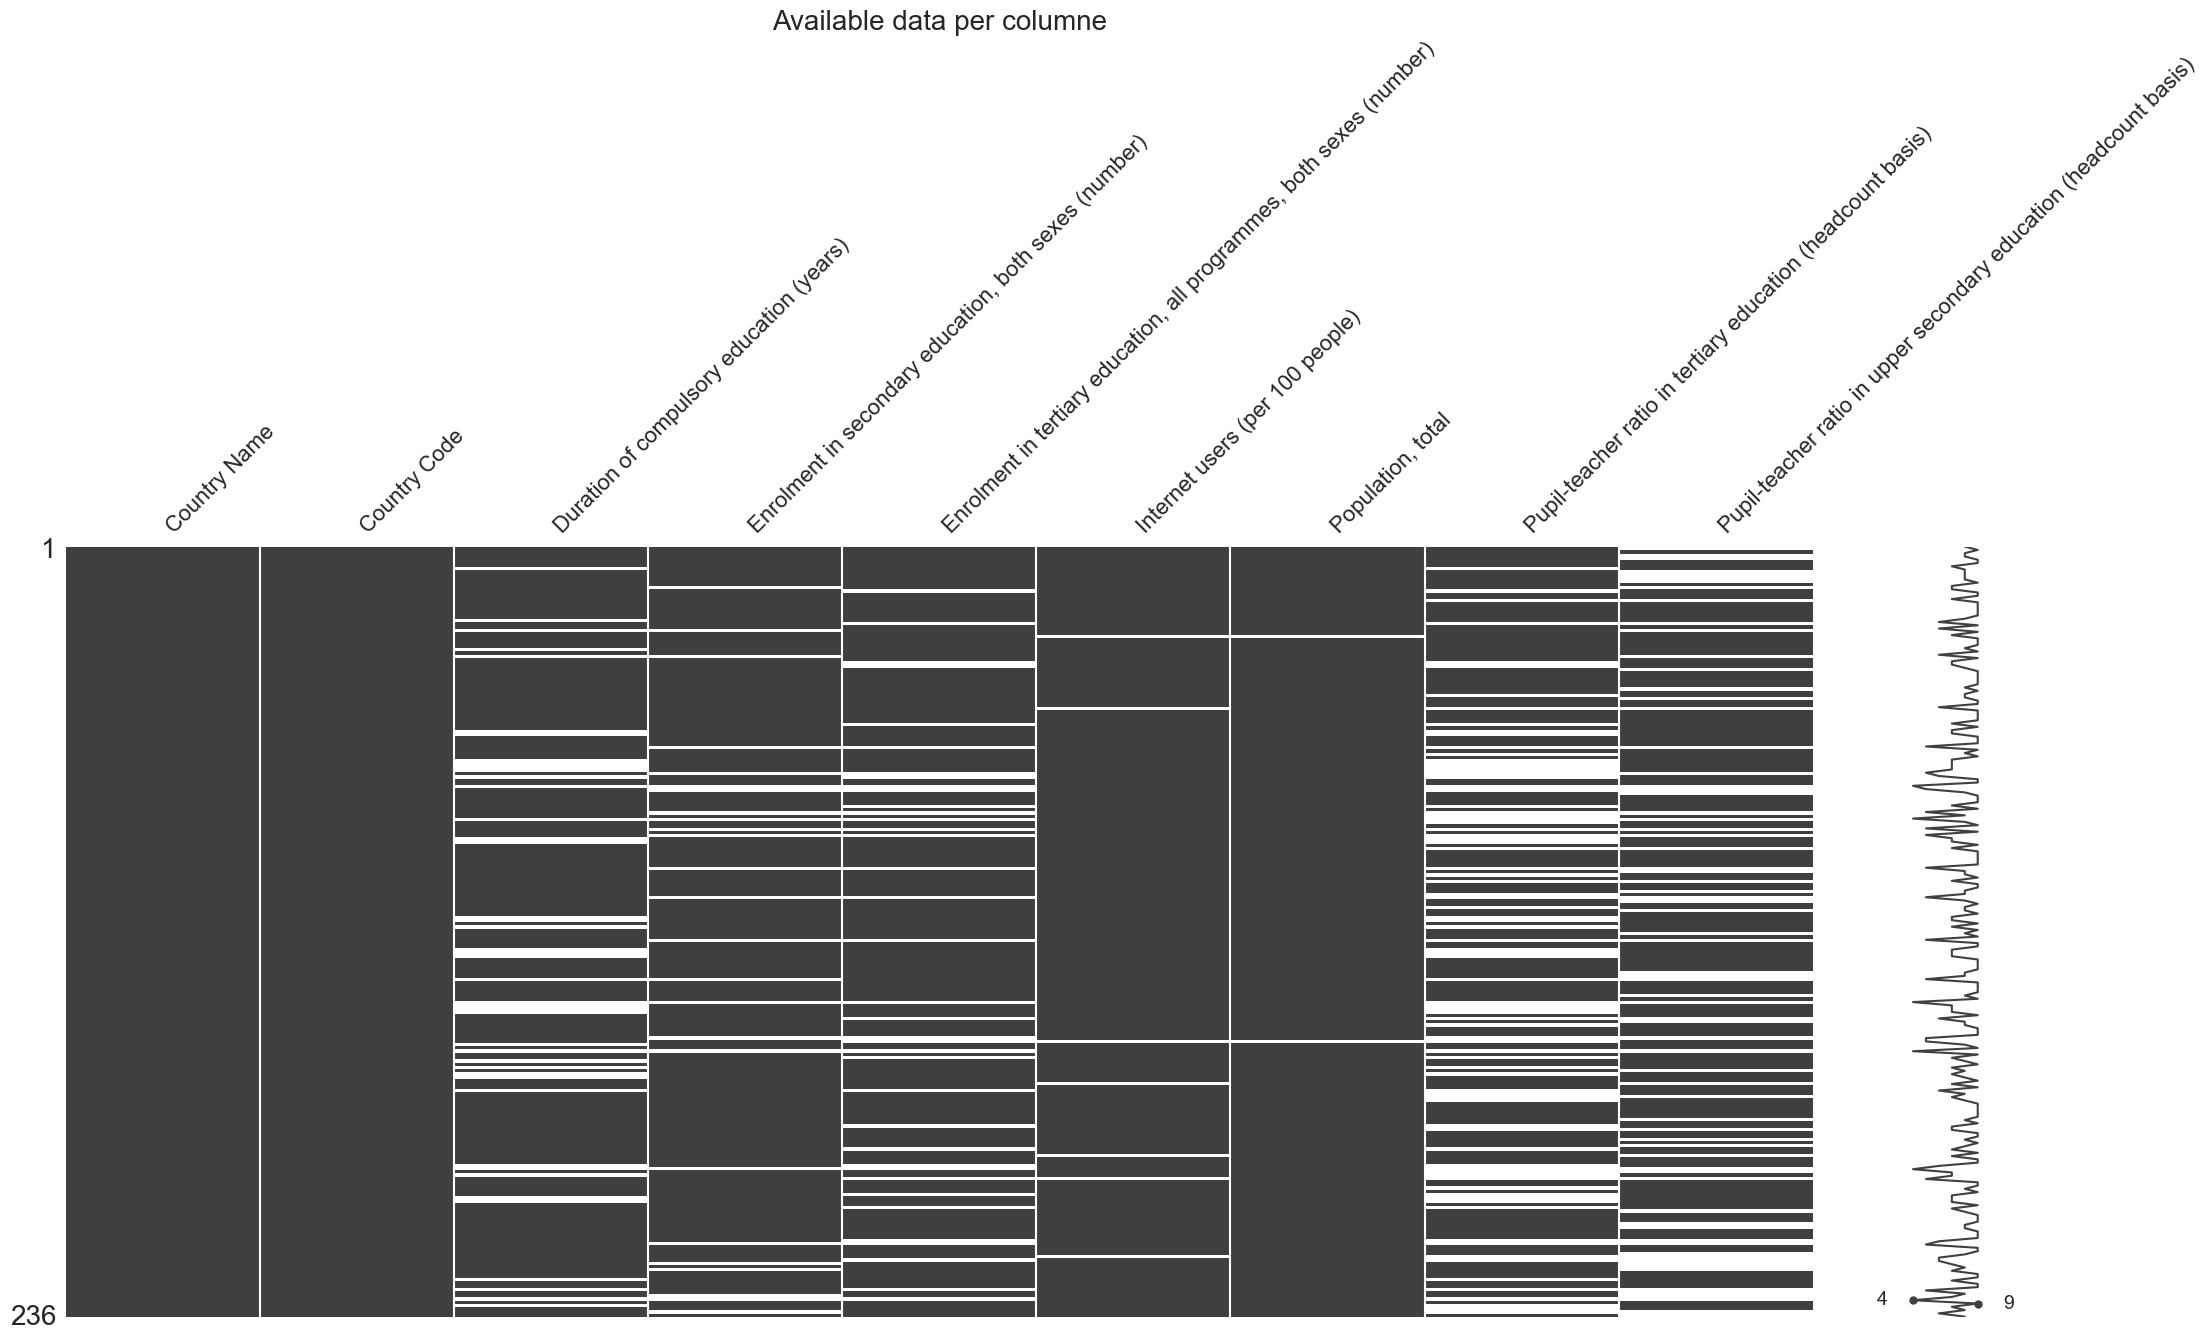

In [50]:
msno.matrix(data_wrk)
plt.title('Available data per columne',fontsize = 20)
plt.show()

Remaining to impute or filter the data of the indicators for which there was no data for the period 2009-2014

#### Filter for each countries with enough population of commercial development

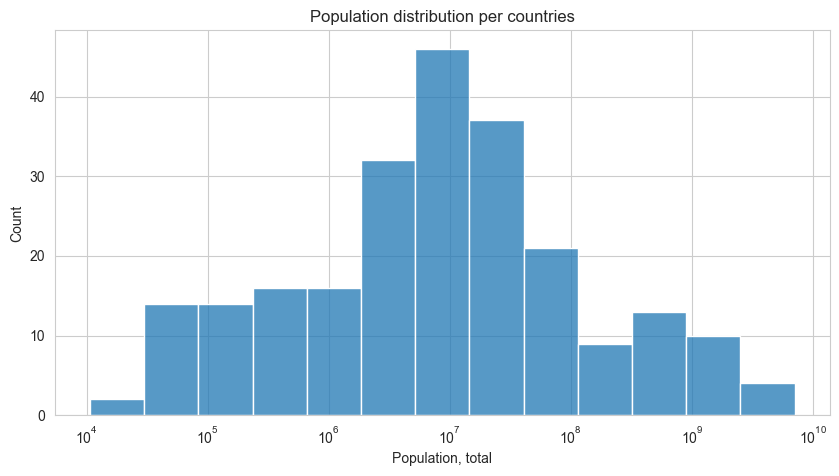

In [51]:
sns.histplot(data=data_wrk,x='Population, total',log_scale=True)
plt.title('Population distribution per countries')
plt.show()

In [52]:
data_wrk=data_wrk.loc[data_wrk['Population, total']>1000000]

#### Filter on the lines representing a conglomerate of countries ex:World

In [53]:
country_stats.loc[country_stats['Region'].isna(),['Country Code','Table Name','Region','Income Group']]

,Country Code,Table Name,Region,Income Group
5,ARB,Arab World,NaN,NaN
57,EAP,East Asia & Pacific,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),NaN,NaN
59,ECA,Europe & Central Asia,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),NaN,NaN
63,EMU,Euro area,NaN,NaN
68,EUU,European Union,NaN,NaN
78,GIB,Gibraltar,NaN,NaN
89,HIC,High income,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),NaN,NaN


The "Country Codes" representing conglomerates of countries can be filtered where the "Region" is NaN.

In [54]:
data_wrk=data_wrk.merge(
    right=country_stats.loc[:,['Country Code','Region','Income Group']],
    how='left',
    left_on='Country Code',
    right_on='Country Code')
data_wrk

,Country Name,Country Code,Duration of compulsory education (years),"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",Internet users (per 100 people),"Population, total",Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group
0,Afghanistan,AFG,9.0,2.254391e+06,1.518543e+05,5.150758,3.028379e+07,28.090020,NaN,South Asia,Low income
1,Albania,ALB,8.5,3.490902e+05,1.430048e+05,51.192660,2.905055e+06,20.576073,17.576995,Europe & Central Asia,Upper middle income
2,Algeria,DZA,10.0,4.588302e+06,1.198471e+06,18.138333,3.723678e+07,27.088920,NaN,Middle East & North Africa,Upper middle income
3,Angola,AGO,6.0,8.155160e+05,1.807385e+05,5.633333,2.469203e+07,18.160749,20.505810,Sub-Saharan Africa,Upper middle income
4,Arab World,ARB,NaN,3.084011e+07,9.082374e+06,30.062305,3.550503e+08,NaN,12.917909,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
178,West Bank and Gaza,PSE,10.0,7.085805e+05,2.063028e+05,42.396667,3.991910e+06,27.745385,18.443847,Middle East & North Africa,Lower middle income
179,World,WLD,NaN,5.577063e+08,1.918756e+08,32.796923,7.056660e+09,NaN,16.698229,NaN,NaN
180,"Yemen, Rep.",YEM,9.0,1.661876e+06,2.714850e+05,16.201917,2.459442e+07,NaN,24.172729,Middle East & North Africa,Lower middle income
181,Zambia,ZMB,7.0,NaN,5.621950e+04,12.613033,1.450755e+07,NaN,NaN,Sub-Saharan Africa,Lower middle income


In [55]:
data_wrk.dropna(axis=0,subset=['Region'],how='all',inplace=True)


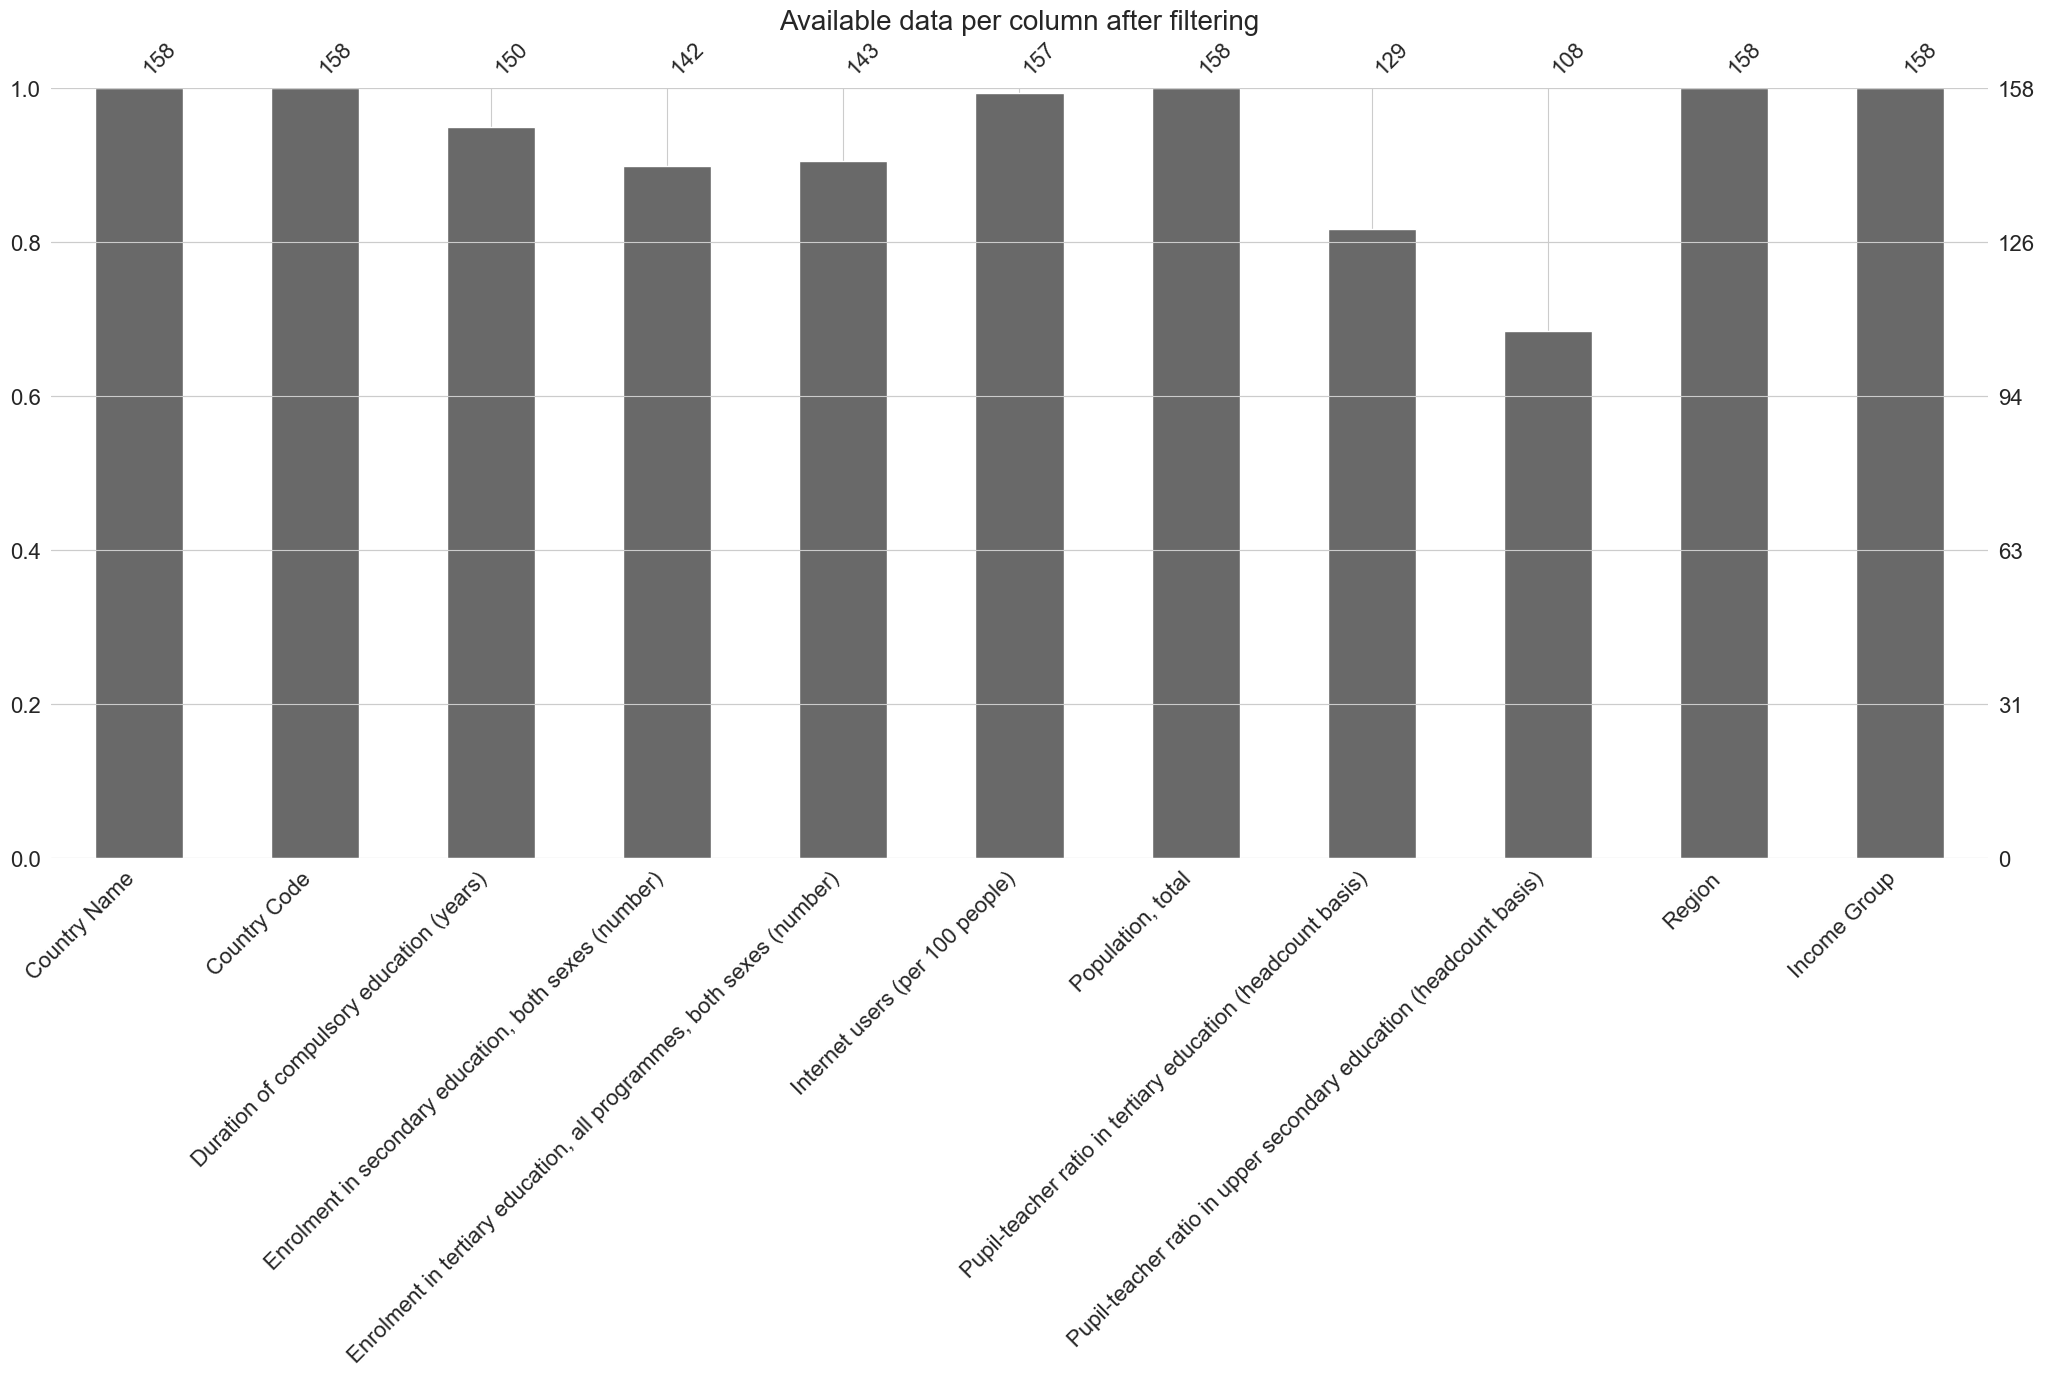

In [56]:
msno.bar(data_wrk)
plt.title('Available data per column after filtering',fontsize = 20)
plt.show()

In [57]:
data_wrk[data_wrk.isna().any(axis=1)]

,Country Name,Country Code,Duration of compulsory education (years),"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",Internet users (per 100 people),"Population, total",Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group
0,Afghanistan,AFG,9.0,2.254391e+06,1.518543e+05,5.150758,3.028379e+07,28.090020,NaN,South Asia,Low income
2,Algeria,DZA,10.0,4.588302e+06,1.198471e+06,18.138333,3.723678e+07,27.088920,NaN,Middle East & North Africa,Upper middle income
5,Argentina,ARG,13.0,4.300298e+06,2.655461e+06,51.733333,4.188306e+07,16.776770,NaN,Latin America & Caribbean,Upper middle income
6,Armenia,ARM,11.5,2.743640e+05,1.305610e+05,34.387134,2.887188e+06,8.157672,NaN,Europe & Central Asia,Lower middle income
7,Australia,AUS,10.0,2.333144e+06,1.334799e+06,79.365199,2.256163e+07,27.472490,NaN,East Asia & Pacific,High income: OECD
...,...,...,...,...,...,...,...,...,...,...,...
176,"Venezuela, RB",VEN,14.0,2.381836e+06,2.123041e+06,45.206681,2.967133e+07,12.874480,NaN,Latin America & Caribbean,Upper middle income
177,Vietnam,VNM,9.0,NaN,2.204598e+06,34.761667,8.835257e+07,28.309240,NaN,East Asia & Pacific,Lower middle income
180,"Yemen, Rep.",YEM,9.0,1.661876e+06,2.714850e+05,16.201917,2.459442e+07,NaN,24.172729,Middle East & North Africa,Lower middle income
181,Zambia,ZMB,7.0,NaN,5.621950e+04,12.613033,1.450755e+07,NaN,NaN,Sub-Saharan Africa,Lower middle income


#### Calculation of indicators per % of population for absolute indicators

In [58]:
data_wrk['Enrolment in secondary education (per 100 people)']=100*data_wrk['Enrolment in secondary education, both sexes (number)']/data_wrk['Population, total'].round(2)
data_wrk['Enrolment in tertiary education (per 100 people)']=100*data_wrk['Enrolment in tertiary education, all programmes, both sexes (number)']/data_wrk['Population, total'].round(2)

data_wrk.drop(columns=['Enrolment in secondary education, both sexes (number)',
                       'Enrolment in tertiary education, all programmes, both sexes (number)',
                       'Population, total'
                       ],inplace=True)

data_wrk.head()

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
0,Afghanistan,AFG,9.0,5.150758,28.090020,NaN,South Asia,Low income,7.444217,0.501438
1,Albania,ALB,8.5,51.192660,20.576073,17.576995,Europe & Central Asia,Upper middle income,12.016644,4.922620
2,Algeria,DZA,10.0,18.138333,27.088920,NaN,Middle East & North Africa,Upper middle income,12.321962,3.218515
3,Angola,AGO,6.0,5.633333,18.160749,20.505810,Sub-Saharan Africa,Upper middle income,3.302749,0.731971
5,Argentina,ARG,13.0,51.733333,16.776770,NaN,Latin America & Caribbean,Upper middle income,10.267392,6.340179


#### Searching for outliers

In [59]:
data_wrk.describe()

,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
count,150.000000,157.000000,129.000000,108.000000,142.000000,143.000000
mean,9.321111,35.900949,19.568404,16.067486,7.978080,2.944596
std,2.095599,28.052047,9.986328,6.790337,2.487997,1.873387
min,5.000000,0.000000,5.443190,6.768870,1.289039,0.070861
25%,8.125000,10.263333,13.482243,11.066570,6.579885,1.185520
50%,9.000000,33.788333,17.620020,14.907221,7.942783,3.027656
75%,10.250000,57.307599,23.606160,19.556954,9.261552,4.407613
max,14.000000,94.160560,60.009689,36.640337,17.750413,7.155194


In [60]:
data_wrk[data_wrk['Internet users (per 100 people)']<1]

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
46,Eritrea,ERI,8.0,0.756667,18.488513,36.640337,Sub-Saharan Africa,Low income,5.885880,0.262161
82,"Korea, Dem. People’s Rep.",PRK,11.0,0.000000,8.586590,NaN,East Asia & Pacific,Low income,9.980414,2.407537


In [61]:
data_wrk[data_wrk['Pupil-teacher ratio in tertiary education (headcount basis)']>40]

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
23,Cameroon,CMR,6.000000,7.809145,52.087894,19.263651,Sub-Saharan Africa,Lower middle income,8.041041,1.265836
60,Greece,GRC,9.000000,52.766048,40.692551,8.422240,Europe & Central Asia,High income: OECD,6.276677,5.984060
103,Mali,MLI,9.000000,3.216667,52.412720,11.947855,Sub-Saharan Africa,Low income,5.208334,0.543128
104,Mauritania,MRT,6.000000,5.446667,40.358163,17.278139,Sub-Saharan Africa,Lower middle income,3.717422,0.425126
116,Nepal,NPL,NaN,9.798217,60.009689,23.287680,South Asia,Low income,10.443512,1.444860
151,Sri Lanka,LKA,9.000000,16.960900,47.397615,18.020715,South Asia,Lower middle income,12.642730,1.350722
154,Sudan,SDN,7.666667,20.500000,44.720490,15.790360,Sub-Saharan Africa,Lower middle income,4.742401,1.576643
158,Syrian Arab Republic,SYR,9.000000,23.181683,51.322024,8.000600,Middle East & North Africa,Lower middle income,12.722863,3.092075


In [62]:
data_wrk[data_wrk['Pupil-teacher ratio in tertiary education (headcount basis)']<7]

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
35,Cuba,CUB,9.000000,20.741246,5.837172,8.411315,Latin America & Caribbean,Upper middle income,7.085233,5.297133
157,Switzerland,CHE,12.000000,84.888838,6.684406,10.946105,Europe & Central Asia,High income: OECD,7.644079,3.305968
167,Turkmenistan,TKM,10.333333,6.490967,5.443190,NaN,Europe & Central Asia,Upper middle income,12.451516,0.849441


In [63]:
data_wrk[data_wrk['Enrolment in secondary education (per 100 people)']<3]

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
25,Central African Republic,CAF,10.0,2.666667,32.637210,NaN,Sub-Saharan Africa,Low income,2.573304,0.264936
120,Niger,NER,NaN,1.324617,11.889417,19.292503,Sub-Saharan Africa,Low income,2.149402,0.104932
149,South Sudan,SSD,8.0,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income,1.289039,NaN


In [64]:
data_wrk[data_wrk['Enrolment in tertiary education (per 100 people)']<0.1]

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
101,Malawi,MWI,8.0,3.648433,12.612505,NaN,Sub-Saharan Africa,Low income,4.860744,0.070861


#### Imputation of missing data with averages over countries in the same region and of the same "Income Group"

Imputation for the first indicator : 'Duration of compulsory education (years)'

In [65]:
data_wrk['Duration of compulsory education (years)'].describe()

count    150.000000
mean       9.321111
std        2.095599
min        5.000000
25%        8.125000
50%        9.000000
75%       10.250000
max       14.000000
Name: Duration of compulsory education (years), dtype: float64

In [66]:
data_wrk.groupby(['Region','Income Group'])['Duration of compulsory education (years)'].median()

Region                      Income Group        
East Asia & Pacific         High income: OECD        9.500000
                            High income: nonOECD     7.500000
                            Low income               8.000000
                            Lower middle income      9.000000
                            Upper middle income      9.000000
Europe & Central Asia       High income: OECD       10.000000
                            High income: nonOECD     9.000000
                            Low income               9.000000
                            Lower middle income     10.083333
                            Upper middle income      9.166667
Latin America & Caribbean   High income: OECD       12.333333
                            High income: nonOECD    13.000000
                            Low income               6.000000
                            Lower middle income     10.500000
                            Upper middle income     12.750000
Middle East & North A

In [67]:
data_wrk['Duration of compulsory education (years)'] = data_wrk.groupby(['Region','Income Group'])['Duration of compulsory education (years)'].transform(lambda x: x.fillna(x.median()))
data_wrk

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
0,Afghanistan,AFG,9.0,5.150758,28.090020,NaN,South Asia,Low income,7.444217,0.501438
1,Albania,ALB,8.5,51.192660,20.576073,17.576995,Europe & Central Asia,Upper middle income,12.016644,4.922620
2,Algeria,DZA,10.0,18.138333,27.088920,NaN,Middle East & North Africa,Upper middle income,12.321962,3.218515
3,Angola,AGO,6.0,5.633333,18.160749,20.505810,Sub-Saharan Africa,Upper middle income,3.302749,0.731971
5,Argentina,ARG,13.0,51.733333,16.776770,NaN,Latin America & Caribbean,Upper middle income,10.267392,6.340179
...,...,...,...,...,...,...,...,...,...,...
177,Vietnam,VNM,9.0,34.761667,28.309240,NaN,East Asia & Pacific,Lower middle income,NaN,2.495228
178,West Bank and Gaza,PSE,10.0,42.396667,27.745385,18.443847,Middle East & North Africa,Lower middle income,17.750413,5.168023
180,"Yemen, Rep.",YEM,9.0,16.201917,NaN,24.172729,Middle East & North Africa,Lower middle income,6.757127,1.103848
181,Zambia,ZMB,7.0,12.613033,NaN,NaN,Sub-Saharan Africa,Lower middle income,NaN,0.387519


In [68]:
data_wrk['Duration of compulsory education (years)'].describe()

count    158.000000
mean       9.266878
std        2.060475
min        5.000000
25%        8.000000
50%        9.000000
75%       10.000000
max       14.000000
Name: Duration of compulsory education (years), dtype: float64

In [69]:
data_wrk[data_wrk['Duration of compulsory education (years)'].isna()]

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)


Imputation of other indicators :

In [70]:
for col in data_wrk.select_dtypes(float).columns :
    data_wrk.loc[:,col] = data_wrk.groupby(['Region','Income Group'])[col].transform(lambda x: x.fillna(x.median()))


c:\Users\Julien\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Julien\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Julien\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Julien\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Julien\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Us

In [71]:
data_wrk.isna().sum()

Country Name                                                          0
Country Code                                                          0
Duration of compulsory education (years)                              0
Internet users (per 100 people)                                       0
Pupil-teacher ratio in tertiary education (headcount basis)           3
Pupil-teacher ratio in upper secondary education (headcount basis)    3
Region                                                                0
Income Group                                                          0
Enrolment in secondary education (per 100 people)                     2
Enrolment in tertiary education (per 100 people)                      2
dtype: int64

Handling of special cases (countries without data in their category)

In [72]:
data_wrk[data_wrk.isna().any(axis=1)]

,Country Name,Country Code,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Region,Income Group,Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
45,Equatorial Guinea,GNQ,6.0,11.472197,NaN,NaN,Sub-Saharan Africa,High income: nonOECD,NaN,NaN
64,Haiti,HTI,6.0,9.545000,NaN,NaN,Latin America & Caribbean,Low income,NaN,NaN
75,Israel,ISR,13.0,69.260324,NaN,9.380735,Middle East & North Africa,High income: OECD,9.296279,4.671552
159,Tajikistan,TJK,9.0,13.775000,15.069407,NaN,Europe & Central Asia,Low income,13.191911,2.478565


For Equatorial Guinea and Haiti, 4 indicators are missing that cannot be imputed with regions and income groups. These two countries will not be considered for the analysis.
Israel and Tajikistan have one missing indicator that will be estimated.

In [73]:
data_wrk=data_wrk.loc[data_wrk['Country Name']!='Equatorial Guinea']
data_wrk=data_wrk.loc[data_wrk['Country Name']!='Haiti']

In [74]:
data_wrk.groupby(['Region','Income Group'])['Pupil-teacher ratio in tertiary education (headcount basis)'].mean()

Region                      Income Group        
East Asia & Pacific         High income: OECD       16.550711
                            High income: nonOECD    13.670928
                            Low income              18.721642
                            Lower middle income     20.217459
                            Upper middle income     18.913074
Europe & Central Asia       High income: OECD       15.863096
                            High income: nonOECD    12.568393
                            Low income              15.069407
                            Lower middle income     11.783514
                            Upper middle income     16.965482
Latin America & Caribbean   High income: OECD       14.712010
                            High income: nonOECD    11.989908
                            Lower middle income     18.812068
                            Upper middle income     14.512026
Middle East & North Africa  High income: OECD             NaN
                     

The indicator for Israel will be estimated with the average of countries with the same income and region but not members of the OECD (Organisation for Economic Co-operation and Development).

In [75]:
israel_mean=data_wrk[
    (data_wrk['Region']=='Middle East & North Africa')
    &(data_wrk['Income Group']=='High income: nonOECD')
    ]['Pupil-teacher ratio in tertiary education (headcount basis)'].mean()
israel_mean

17.19238556226094

In [76]:
data_wrk.loc[data_wrk['Country Name']=='Israel','Pupil-teacher ratio in tertiary education (headcount basis)']=israel_mean

The indicator for Tajikistan will be estimated with the average of countries in the same region and of a higher income category (Lower middle income instead of Low income)

In [77]:
data_wrk.groupby(['Region','Income Group'])['Pupil-teacher ratio in upper secondary education (headcount basis)'].mean()

Region                      Income Group        
East Asia & Pacific         High income: OECD       13.362048
                            High income: nonOECD    14.905090
                            Low income              26.911457
                            Lower middle income     22.606489
                            Upper middle income     17.053709
Europe & Central Asia       High income: OECD       11.344098
                            High income: nonOECD     8.729735
                            Low income                    NaN
                            Lower middle income     11.646660
                            Upper middle income     12.831192
Latin America & Caribbean   High income: OECD       20.964090
                            High income: nonOECD    12.975844
                            Lower middle income     18.701688
                            Upper middle income     16.261085
Middle East & North Africa  High income: OECD        9.380735
                     

In [78]:
tajikistan_mean=data_wrk[
    (data_wrk['Region']=='Europe & Central Asia')
    &(data_wrk['Income Group']=='Lower middle income')
    ]['Pupil-teacher ratio in upper secondary education (headcount basis)'].mean()
tajikistan_mean

11.64666006300183

In [79]:
data_wrk.loc[data_wrk['Country Name']=='Tajikistan','Pupil-teacher ratio in upper secondary education (headcount basis)']=tajikistan_mean

In [80]:
data_wrk.isna().sum()

Country Name                                                          0
Country Code                                                          0
Duration of compulsory education (years)                              0
Internet users (per 100 people)                                       0
Pupil-teacher ratio in tertiary education (headcount basis)           0
Pupil-teacher ratio in upper secondary education (headcount basis)    0
Region                                                                0
Income Group                                                          0
Enrolment in secondary education (per 100 people)                     0
Enrolment in tertiary education (per 100 people)                      0
dtype: int64

### Data visualization

In [81]:
indicators_list=['Duration of compulsory education (years)',
                   'Internet users (per 100 people)',
                   'Pupil-teacher ratio in tertiary education (headcount basis)',
                   'Pupil-teacher ratio in upper secondary education (headcount basis)',
                   'Enrolment in secondary education (per 100 people)',
                   'Enrolment in tertiary education (per 100 people)']

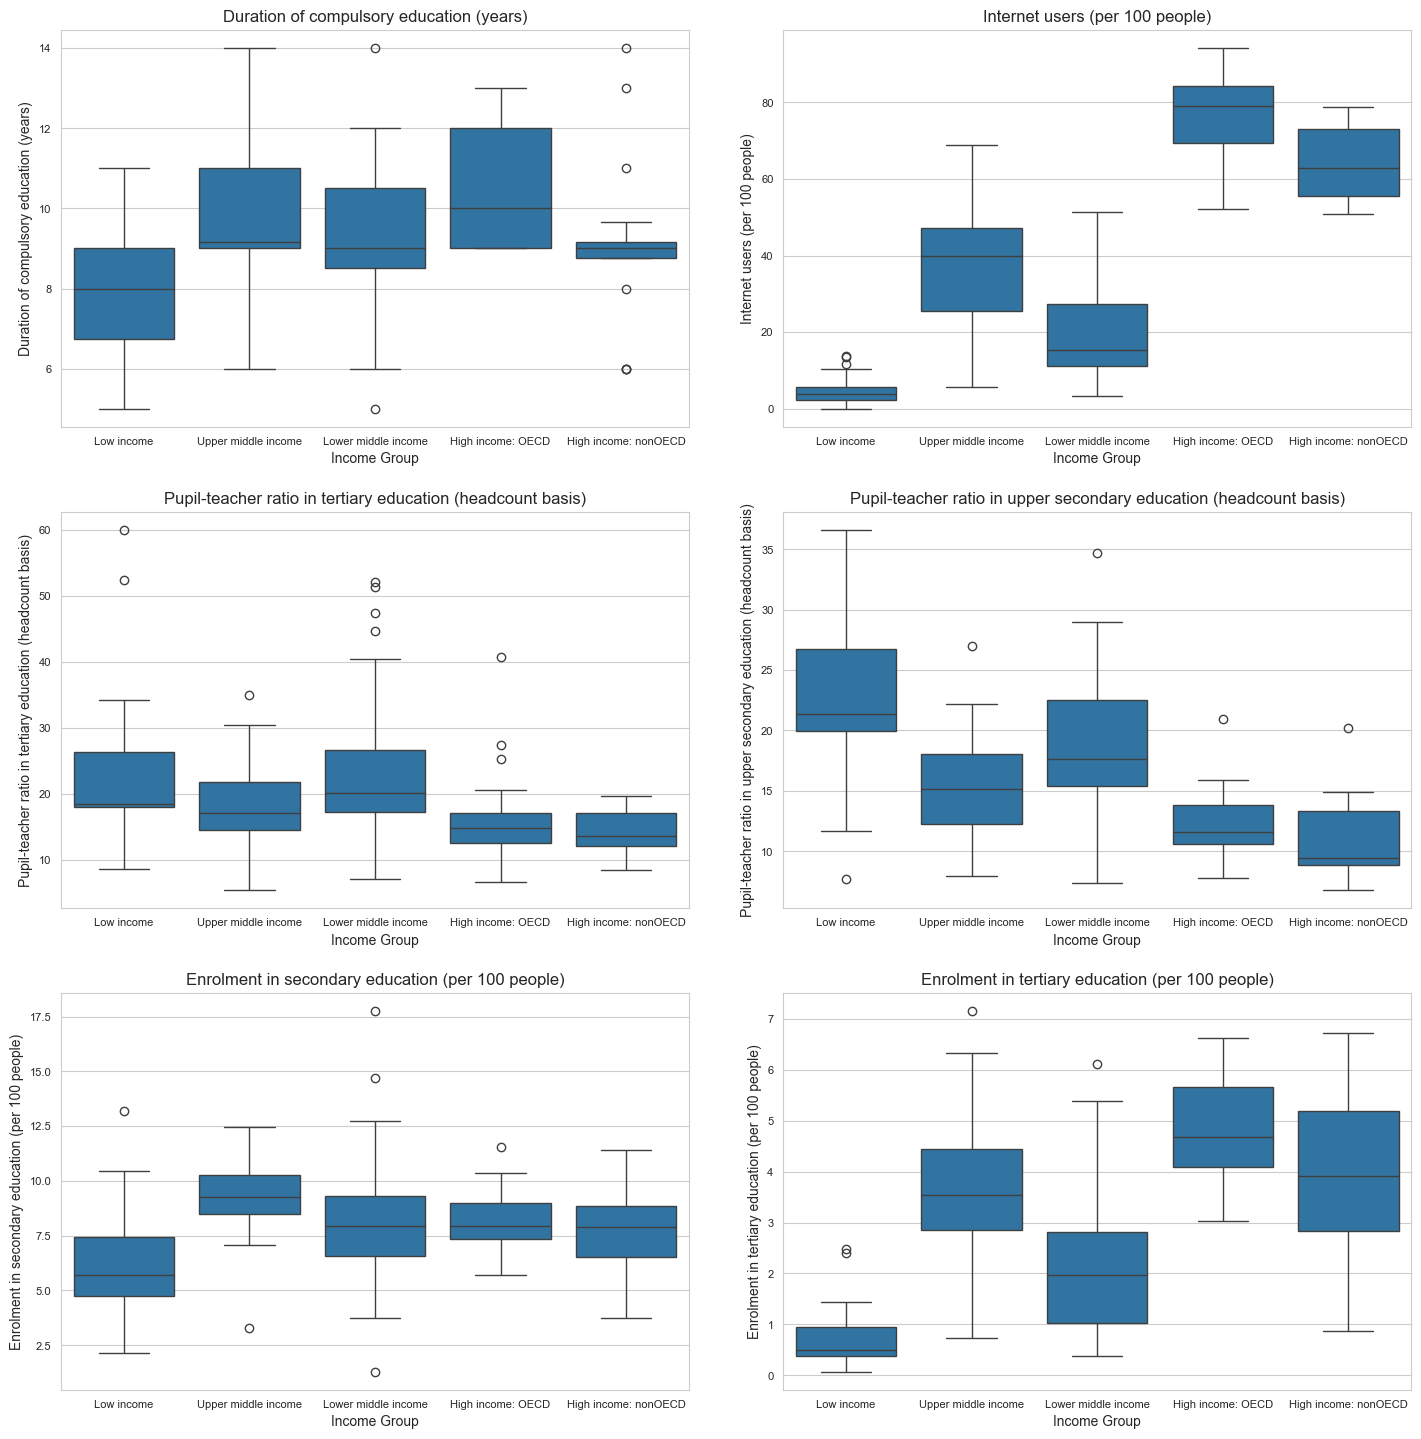

In [82]:
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(15, 15),sharex=False)
fig.tight_layout(pad=4.0)
for ax, col in zip(axs.ravel(),indicators_list):
    sns.boxplot(data=data_wrk,x='Income Group',y=col,ax=ax,showfliers=True)
    ax.set_title(col,size=12)
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    ax.tick_params(labelsize=8)
plt.show()    

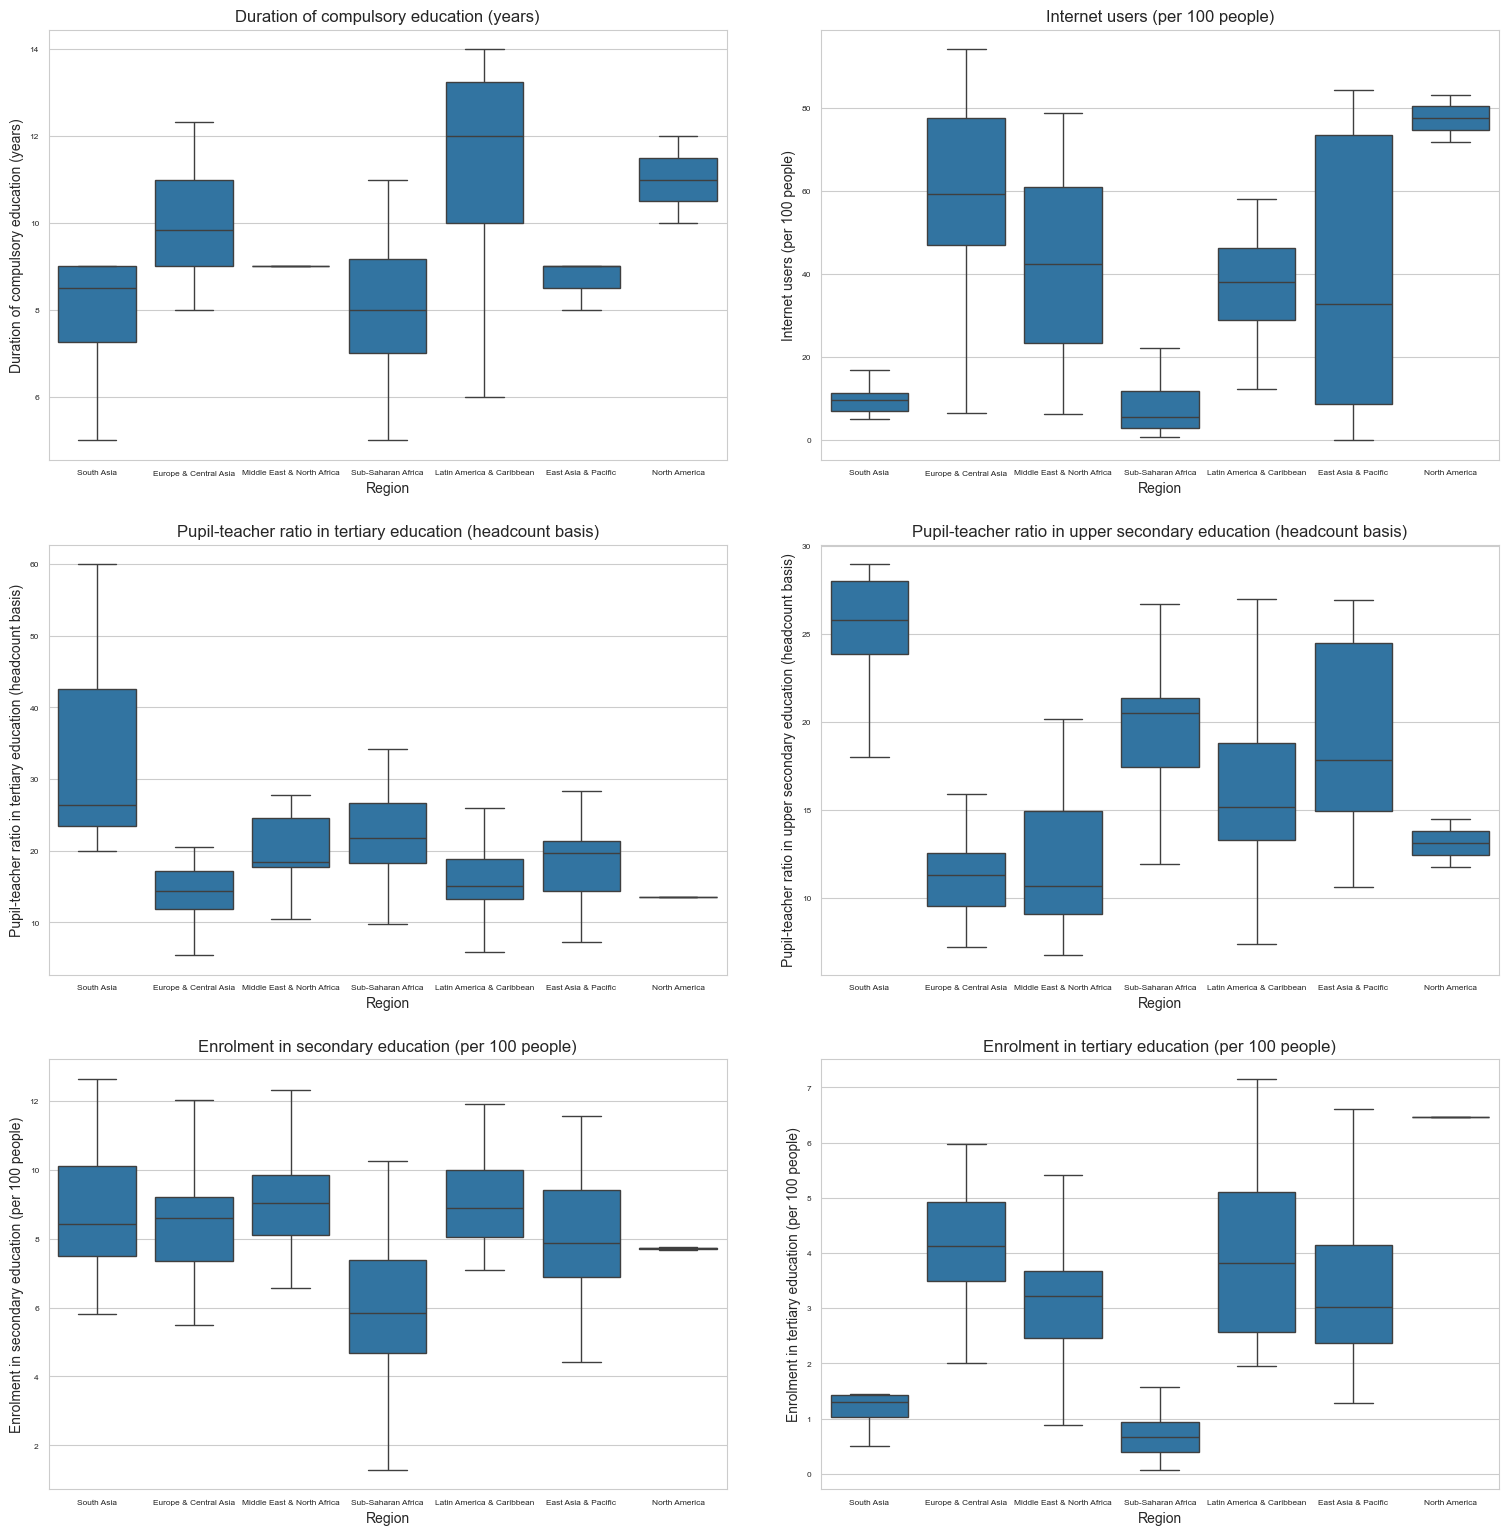

In [83]:
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(16, 16),sharex=False)
fig.tight_layout(pad=4.0)
for ax, col in zip(axs.ravel(),indicators_list):
    sns.boxplot(data=data_wrk,x='Region',y=col,ax=ax,showfliers=False)
    handles, labels = ax.get_legend_handles_labels()
    ax.set_title(col,size=12)
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    ax.tick_params(labelsize=6)
plt.show()  

In [84]:
stats={}
for indicateur in indicators_list:
    stats[indicateur]=data_wrk.groupby('Region')[indicateur].describe().round(1)
    print(indicateur)
    display(stats[indicateur])

Duration of compulsory education (years)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,19.0,8.6,1.9,5.0,8.5,9.0,9.0,12.0
Europe & Central Asia,45.0,10.0,1.2,8.0,9.0,9.8,11.0,12.3
Latin America & Caribbean,22.0,11.4,2.6,6.0,10.0,12.0,13.2,14.0
Middle East & North Africa,19.0,9.0,1.5,6.0,9.0,9.0,9.0,13.0
North America,2.0,11.0,1.4,10.0,10.5,11.0,11.5,12.0
South Asia,6.0,8.3,2.3,5.0,7.2,8.5,9.0,12.0
Sub-Saharan Africa,43.0,8.1,1.6,5.0,7.0,8.0,9.2,11.0


Internet users (per 100 people)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,19.0,38.2,32.2,0.0,8.7,32.8,73.6,84.2
Europe & Central Asia,45.0,59.6,22.0,6.5,47.1,59.2,77.6,94.2
Latin America & Caribbean,22.0,36.9,13.9,12.4,28.9,38.1,46.3,58.2
Middle East & North Africa,19.0,43.1,22.9,6.3,23.3,42.4,61.1,78.9
North America,2.0,77.6,8.0,71.9,74.8,77.6,80.4,83.3
South Asia,6.0,9.9,4.3,5.2,7.0,9.7,11.4,17.0
Sub-Saharan Africa,43.0,8.7,8.0,0.8,3.0,5.6,11.8,34.4


Pupil-teacher ratio in tertiary education (headcount basis)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,19.0,18.3,5.8,7.2,14.3,19.7,21.4,28.3
Europe & Central Asia,45.0,15.2,6.8,5.4,11.9,14.4,17.1,40.7
Latin America & Caribbean,22.0,15.3,4.5,5.8,13.3,15.1,18.8,25.9
Middle East & North Africa,19.0,21.2,8.9,7.4,17.7,18.5,24.6,51.3
North America,2.0,13.5,0.0,13.5,13.5,13.5,13.5,13.5
South Asia,6.0,33.9,16.1,19.9,23.4,26.4,42.6,60.0
Sub-Saharan Africa,43.0,23.8,9.7,9.7,18.3,21.8,26.7,52.4


Pupil-teacher ratio in upper secondary education (headcount basis)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,19.0,19.7,5.5,10.6,14.9,17.8,24.5,26.9
Europe & Central Asia,45.0,11.5,2.6,7.2,9.6,11.3,12.5,17.9
Latin America & Caribbean,22.0,16.7,6.1,7.4,13.3,15.2,18.8,34.7
Middle East & North Africa,19.0,12.2,5.0,6.8,9.1,10.7,14.9,24.2
North America,2.0,13.1,1.9,11.8,12.4,13.1,13.8,14.5
South Asia,6.0,25.1,4.1,18.0,23.9,25.8,28.0,29.0
Sub-Saharan Africa,43.0,20.6,5.2,7.7,17.5,20.5,21.4,36.6


Enrolment in secondary education (per 100 people)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,19.0,7.9,1.9,4.4,6.9,7.9,9.4,11.6
Europe & Central Asia,45.0,8.7,1.9,5.5,7.4,8.6,9.2,14.7
Latin America & Caribbean,22.0,9.1,1.3,7.1,8.0,8.9,10.0,11.9
Middle East & North Africa,19.0,9.3,2.9,3.8,8.1,9.0,9.8,17.8
North America,2.0,7.7,0.0,7.7,7.7,7.7,7.7,7.7
South Asia,6.0,8.9,2.4,5.8,7.5,8.4,10.1,12.6
Sub-Saharan Africa,43.0,5.9,2.1,1.3,4.7,5.8,7.4,10.3


Enrolment in tertiary education (per 100 people)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,19.0,3.4,1.7,1.3,2.4,3.0,4.1,6.6
Europe & Central Asia,45.0,4.1,1.2,0.8,3.5,4.1,4.9,6.0
Latin America & Caribbean,22.0,4.1,1.6,1.9,2.6,3.8,5.1,7.2
Middle East & North Africa,19.0,3.1,1.3,0.9,2.5,3.2,3.7,5.4
North America,2.0,6.5,0.0,6.5,6.5,6.5,6.5,6.5
South Asia,6.0,1.3,0.5,0.5,1.0,1.3,1.4,2.0
Sub-Saharan Africa,43.0,0.8,0.6,0.1,0.4,0.7,0.9,3.0


### Calculation of a global score per country

#### Method: unweighted average of normalized indicators

For all indicators, a high value should translate into a high score:
- 'Duration of compulsory education (years)', 'Enrolment in secondary education' and 'Enrolment in tertiary education' are indicators of the proportion of the population that may be interested in this product. The higher these indicators, the higher the potential product development score.
- 'Internet users' transcribes the population that can connect to the platform. As with the previous indicators, high values should translate into a high score.
- 'Pupil-teacher ratio' translates the availability of teachers. The assumption is that the higher this ratio, the more students have difficulty having personalized follow-up and the more they may be requesting study aids in the form of, for example, online courses.

In [85]:
data_wrk.index=data_wrk['Country Name']
scores=data_wrk.drop(columns=['Country Name','Country Code','Region','Income Group'])
scores

,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
Country Name,,,,,,
Afghanistan,9.0,5.150758,28.090020,25.982059,7.444217,0.501438
Albania,8.5,51.192660,20.576073,17.576995,12.016644,4.922620
Algeria,10.0,18.138333,27.088920,10.680117,12.321962,3.218515
Angola,6.0,5.633333,18.160749,20.505810,3.302749,0.731971
Argentina,13.0,51.733333,16.776770,15.150395,10.267392,6.340179
...,...,...,...,...,...,...
Vietnam,9.0,34.761667,28.309240,23.776430,8.210947,2.495228
West Bank and Gaza,10.0,42.396667,27.745385,18.443847,17.750413,5.168023
"Yemen, Rep.",9.0,16.201917,26.113833,24.172729,6.757127,1.103848


In [86]:
scaler=StandardScaler()
columns=scores.columns
index=scores.index

scores=pd.DataFrame(scaler.fit_transform(scores))
scores.columns=columns
scores.index=index

scores.describe().round(1)


,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people)
count,156.0,156.0,156.0,156.0,156.0,156.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.1,-1.3,-1.5,-1.5,-2.8,-1.5
25%,-0.6,-0.9,-0.6,-0.8,-0.6,-0.9
50%,-0.2,-0.1,-0.1,-0.2,0.0,0.0
75%,0.3,0.8,0.4,0.7,0.5,0.7
max,2.3,2.1,4.4,3.2,4.1,2.3


In [87]:
scores['score']=scores.mean(axis=1)
scores

,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people),score
Country Name,,,,,,,
Afghanistan,-0.151854,-1.105212,0.944967,1.534055,-0.217849,-1.287976,-0.047312
Albania,-0.397763,0.540677,0.126884,0.192066,1.679765,1.078960,0.536765
Algeria,0.339964,-0.640937,0.835972,-0.909120,1.806475,0.166645,0.266500
Angola,-1.627310,-1.087961,-0.136085,0.659693,-1.936609,-1.164558,-0.882138
Argentina,1.815420,0.560004,-0.286767,-0.195376,0.953804,1.837868,0.780826
...,...,...,...,...,...,...,...
Vietnam,-0.151854,-0.046692,0.968834,1.181895,0.100354,-0.220576,0.305327
West Bank and Gaza,0.339964,0.226241,0.907444,0.330471,4.059349,1.210340,1.178968
"Yemen, Rep.",-0.151854,-0.710159,0.729809,1.245170,-0.503000,-0.965468,-0.059251


Text(0.5, 1.0, 'Score distribution')

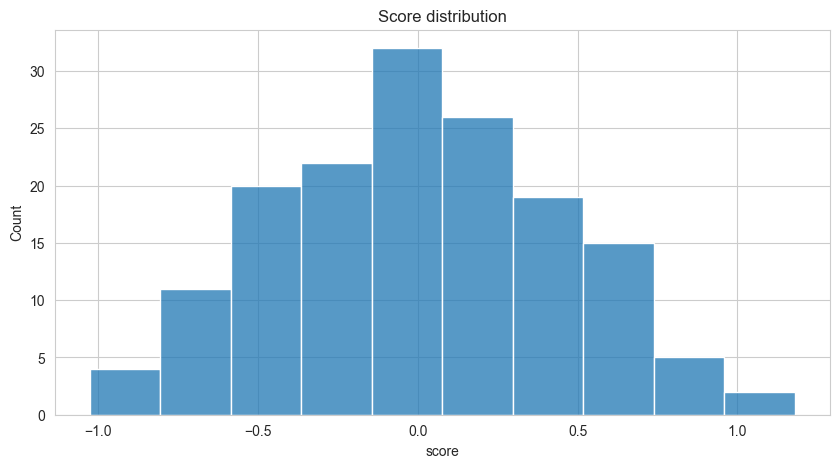

In [88]:
sns.histplot(scores['score'])
plt.title('Score distribution')

In [89]:
scores.sort_values('score',ascending=False,inplace=True)
print('Top 10 :')
display(scores.head(10))
print('Bottom 10 :')
display(scores.tail(10))

Top 10 :


,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people),score
Country Name,,,,,,,
West Bank and Gaza,0.339964,0.226241,0.907444,0.330471,4.059349,1.210340,1.178968
Dominican Republic,2.307238,0.110299,0.709674,1.695401,0.459114,0.836009,1.019623
Turkey,0.339964,0.269887,1.696314,0.248348,1.530992,1.463587,0.924849
Australia,0.339964,1.547778,0.877733,-0.406782,0.984437,1.610903,0.825672
Argentina,1.815420,0.560004,-0.286767,-0.195376,0.953804,1.837868,0.780826
Mongolia,1.323601,-0.772533,0.033740,1.181895,1.017150,1.719418,0.750545
Brazil,2.307238,0.377161,-0.012845,-0.191288,1.641254,0.341356,0.743813
Chile,1.487541,0.575314,-0.511568,0.732864,0.350777,1.770535,0.734244
New Zealand,0.339964,1.637882,-0.285847,-0.406782,1.486431,1.624721,0.732728


Bottom 10 :


,Duration of compulsory education (years),Internet users (per 100 people),Pupil-teacher ratio in tertiary education (headcount basis),Pupil-teacher ratio in upper secondary education (headcount basis),Enrolment in secondary education (per 100 people),Enrolment in tertiary education (per 100 people),score
Country Name,,,,,,,
Burkina Faso,0.339964,-1.118019,-0.103666,-0.051390,-1.660718,-1.357967,-0.658633
Liberia,-1.627310,-1.182037,0.394557,0.141325,-0.984988,-1.053213,-0.718611
"Congo, Dem. Rep.",-1.627310,-1.233573,-0.194957,0.796100,-0.971526,-1.197954,-0.738203
South Sudan,-0.643673,-0.890753,0.789452,0.172683,-2.772323,-1.086445,-0.738510
Malawi,-0.643673,-1.158917,-0.740152,0.796100,-1.290022,-1.518491,-0.759192
Chad,0.339964,-1.214269,-1.053291,0.479220,-1.842622,-1.439494,-0.788415
Benin,-1.627310,-1.140878,-0.120327,-1.390750,0.278526,-0.914590,-0.819221
Madagascar,-2.119128,-1.204558,-0.124396,0.595120,-0.845120,-1.342558,-0.840107
Angola,-1.627310,-1.087961,-0.136085,0.659693,-1.936609,-1.164558,-0.882138


##### Scores visualization

Visualization of the contribution of each indicator to the overall score

In [90]:
fig = go.Figure()
fig.update_layout(title='Contribution of each indicator to the global score : (zoom to explore)',
                  width=1150, 
                  height=1000,
                  xaxis_title="Score",
                  yaxis_title="Country",)

for col in scores.columns[:-1]:
    fig.add_trace(go.Bar(
        y=scores.index,
        x=scores[col]/6,
        name=col,
        orientation='h'))

fig.show()

In [91]:
top=scores.head(10)
top['Label']=top.index+' : '+top['score'].round(2).astype(str)
fig = go.Figure()
fig.update_layout(title='Contribution of each indicator to the global score for top 10 countries',
                  width=1150, 
                  height=700,
                  xaxis_title="Contribution of each indicator",
                  yaxis_title="Country and total score",)

for col in scores.columns[:-1]:
    fig.add_trace(go.Bar(
        y=top['Label'],
        x=(top[col]/6).round(2),
        name=col,
        orientation='h'))

fig.show()


C:\Users\Julien\AppData\Local\Temp\ipykernel_17620\1046238570.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
bottom=scores.tail(10)
bottom['Label']=bottom.index+' : '+bottom['score'].round(2).astype(str)
fig = go.Figure()
fig.update_layout(title='Contribution of each indicator to the global score for bottom 10 countries',
                  width=1150, 
                  height=700,
                  xaxis_title="Contribution of each indicator",
                  yaxis_title="Country and total score",)

for col in scores.columns[:-1]:
    fig.add_trace(go.Bar(
        y=bottom['Label'],
        x=(bottom[col]/6).round(2),
        name=col,
        orientation='h'))

fig.show()

C:\Users\Julien\AppData\Local\Temp\ipykernel_17620\1998750235.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualization of the distribution of indicators

In [93]:
for ax, col in zip(axs.ravel(),indicators_list):
    sns.boxplot(data=data_wrk,x='Income Group',y=col,ax=ax,showfliers=True)
    ax.set_title(col,size=12)
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    ax.tick_params(labelsize=8)
plt.show()  

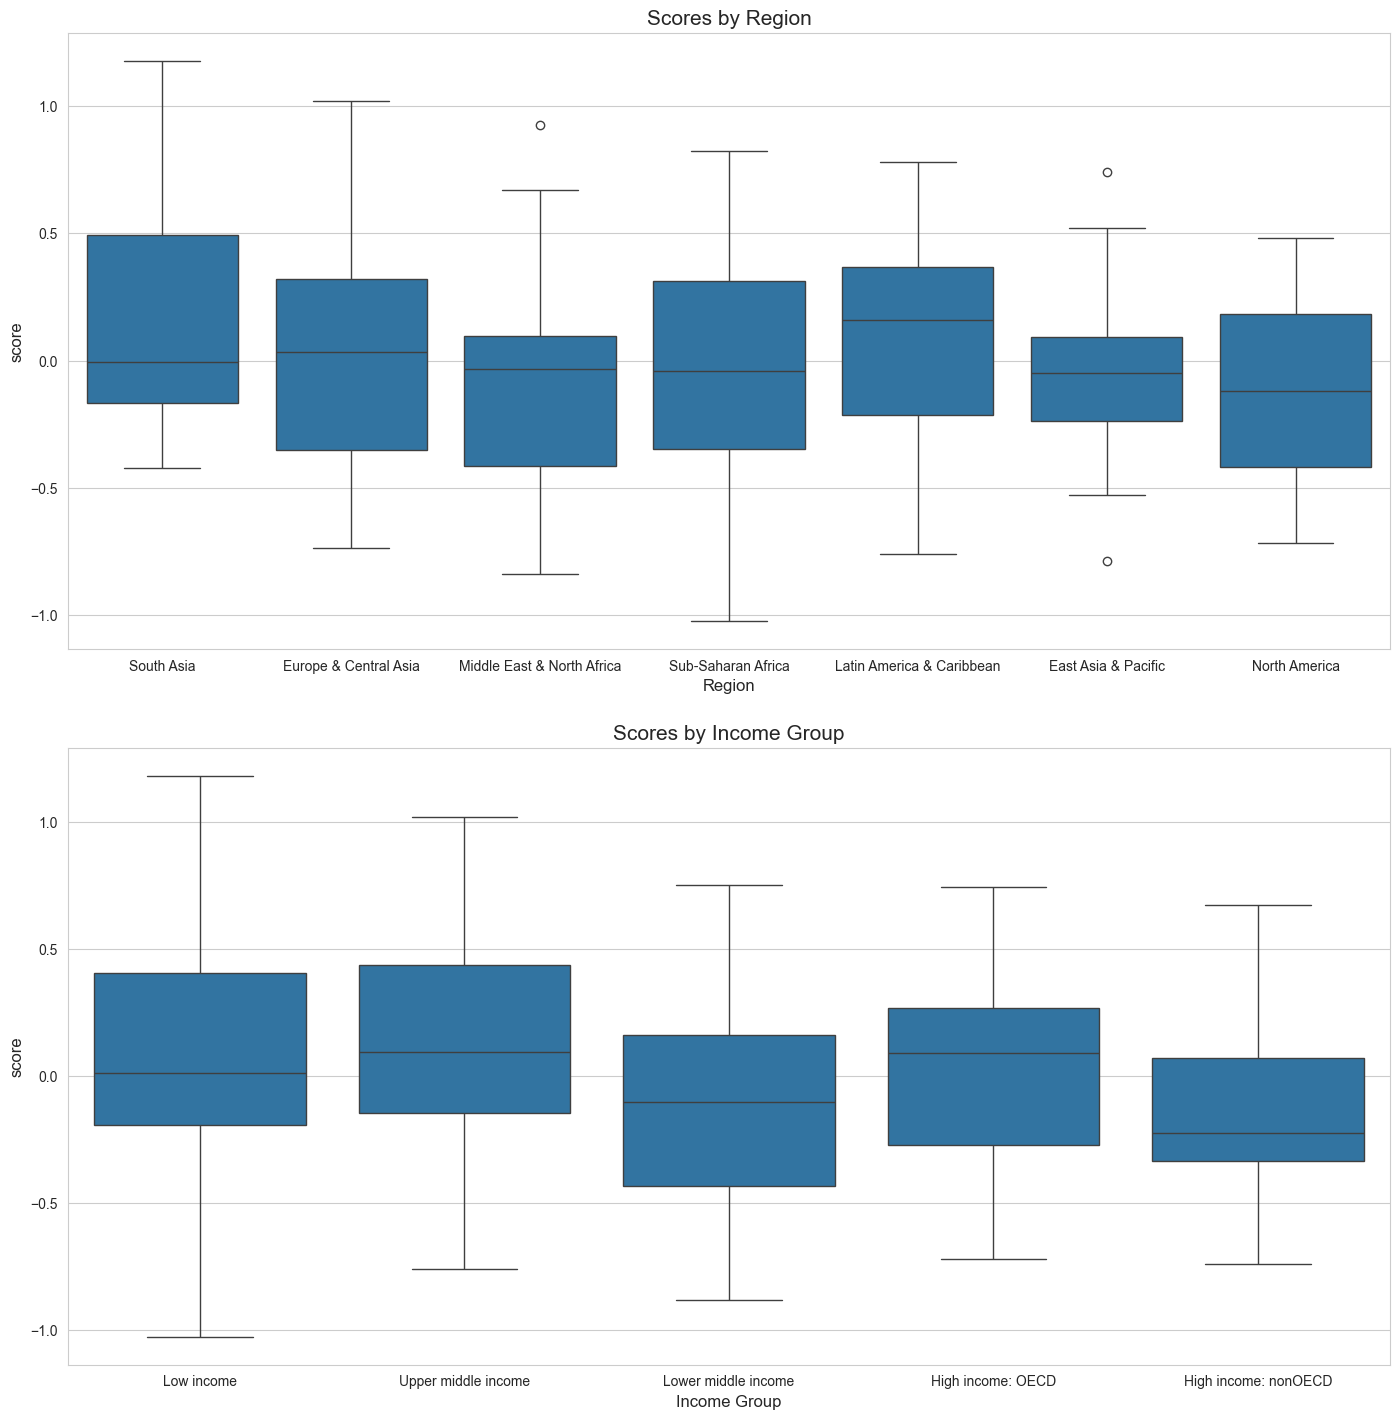

In [94]:
df_temp=pd.merge(left=scores,right=data_wrk[['Country Name','Region','Income Group']],on=index)
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(15, 15),sharex=False)
fig.tight_layout(pad=5.0)

sns.boxplot(data=df_temp,x='Region',y='score',showfliers=True,ax=axs[0])
axs[0].set_title('Scores by Region',size=15)
axs[0].yaxis.label.set_size(12)
axs[0].xaxis.label.set_size(12)
axs[0].tick_params(labelsize=10)

sns.boxplot(data=df_temp,x='Income Group',y='score',showfliers=True,ax=axs[1])
axs[1].set_title('Scores by Income Group',size=15)
axs[1].yaxis.label.set_size(12)
axs[1].xaxis.label.set_size(12)
axs[1].tick_params(labelsize=10)
plt.show()  

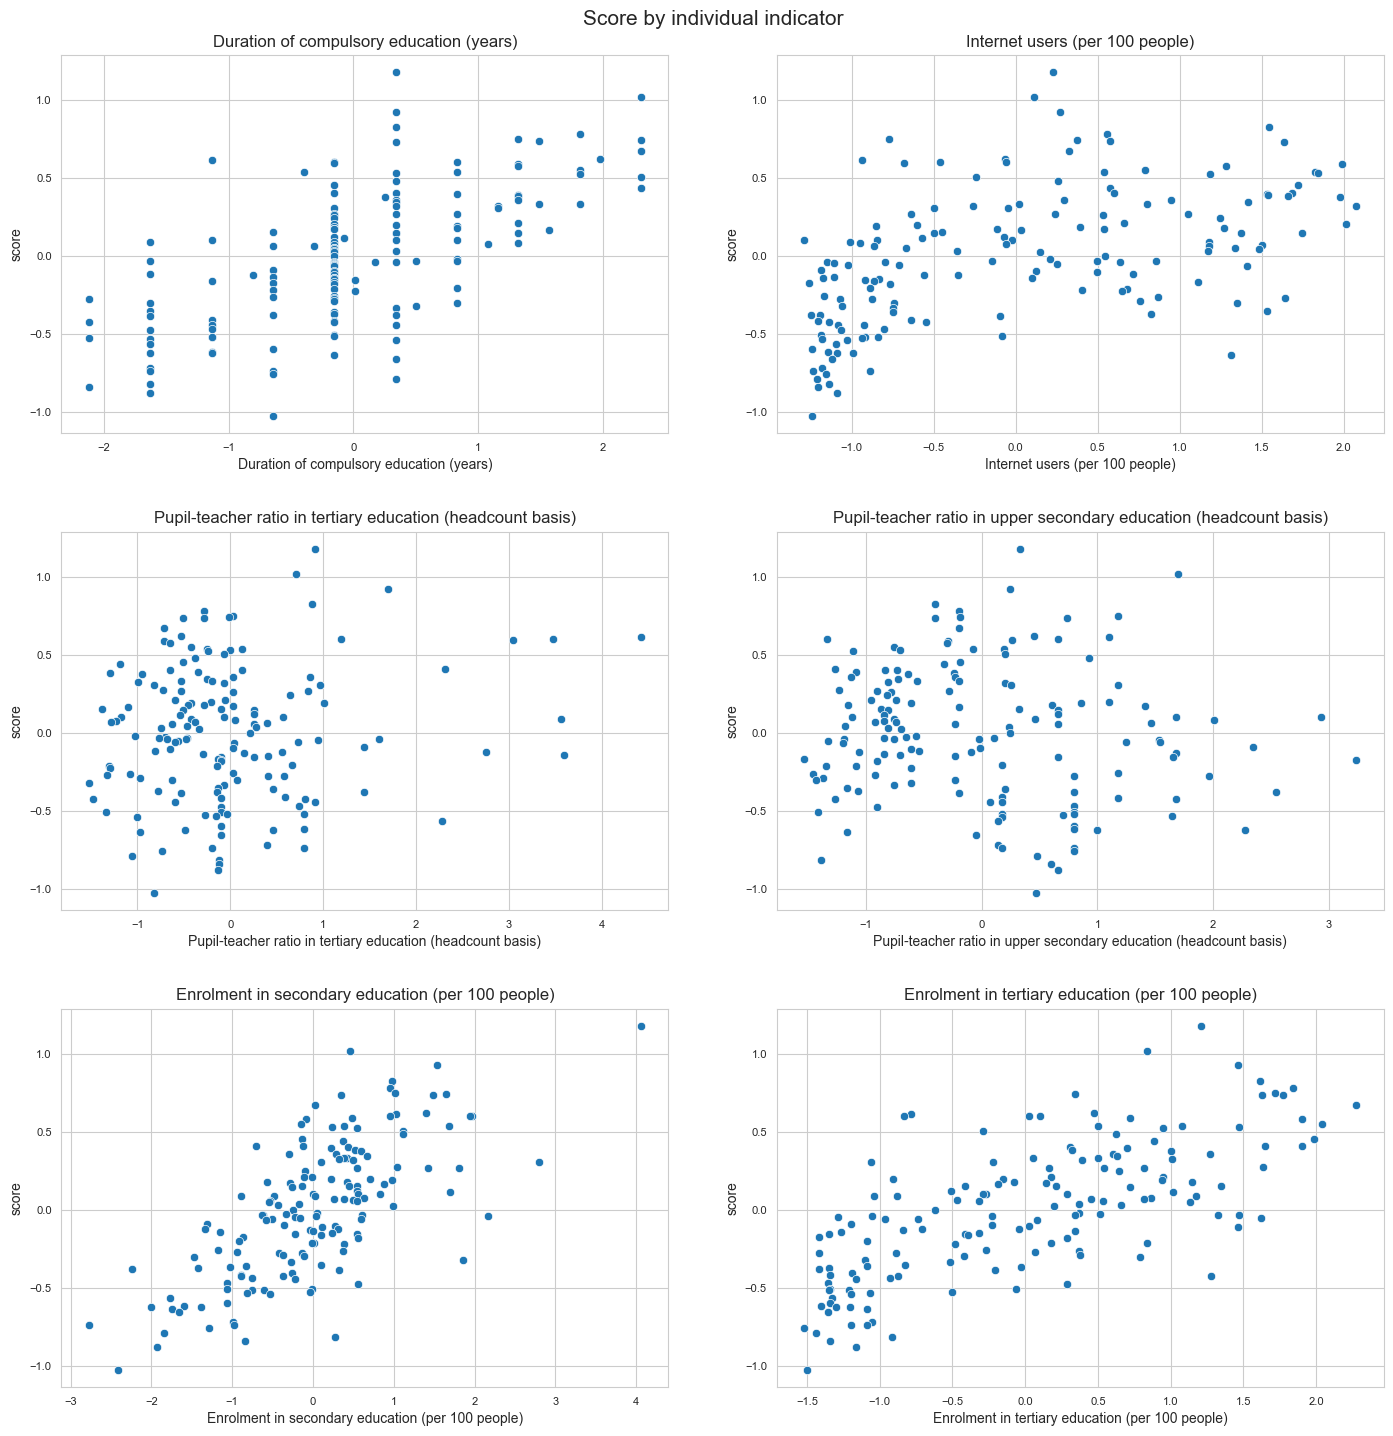

In [95]:
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(15, 15),sharex=False)
fig.tight_layout(pad=5.0)
for ax, col in zip(axs.ravel(),scores.columns[:-1]):
    sns.scatterplot(data=scores,x=col,y='score',ax=ax)
    ax.set_title(col,size=12)
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    ax.tick_params(labelsize=8)
plt.suptitle('Score by individual indicator',size=15)
plt.show()  
